In [24]:
"""
Title     : Aruba 17
Author    : Jan-Luca Nettingsmeier, Dimitri Dening
Created   : 14.11.2024
"""

'\nTitle     : Aruba 17\nAuthor    : Jan-Luca Nettingsmeier, Dimitri Dening\nCreated   : 14.11.2024\n'

In [25]:
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.widgets import CheckButtons
import pandas as pd
import numpy as np
import seaborn as sns
import re

#### Daten einordnen / sortieren nach Skalenniveau
|Skalenniveau| Messbar   | Datentyp| Lagemaße|
|------------|-----------|------------|------------|
|Nominal | Häufigkeit | Sensor Status (M = Motion ON/OFF), Sensor Status (D = Door OPEN/CLOSE)| Modus|
|Ordinal | Häufigkeit, Ordnung | Datum (date), Zeitstempel (time)| Modus, Median|
|Intervall |Häufigkeit, Ordnung, Abstand| Sensor Status (T = Temperature)| Modus, Median, Mittelwert|
|Verhältnis |Häufigkeit, Ordnung, Abstand, Nullpunkt| NaN | Modus, Median, Mittelwert|

In [ ]:
data_dir = "../data/aruba/data.csv"
df_aruba = pd.read_csv(
    data_dir,
    sep=r"\s+",
    names=[
        "date",
        "time",
        "sensor_type",
        "sensor_status",
        "meta",
        "meta_begin_end",
    ],
)

pattern_motion_sensor = r"[M]{1}[0-9]{3,}"
pattern_temperature_sensor = r"[T]{1}[0-9]{3,}"
pattern_door_closure_sensor = r"[D]{1}[0-9]{3,}"

# Create subsets for each sensor type
df_motion_sensor = df_aruba[df_aruba["sensor_type"].str.match(pattern_motion_sensor)]
df_temperature_sensor = df_aruba[df_aruba["sensor_type"].str.match(pattern_temperature_sensor)]
df_door_closure_sensor = df_aruba[df_aruba["sensor_type"].str.match(pattern_door_closure_sensor)]

display(df_temperature_sensor)

date             time sensor_type sensor_status      meta  \
2        2010-11-04  00:15:08.984841        T002          21.5       NaN   
3        2010-11-04  00:30:19.185547        T003            21       NaN   
4        2010-11-04  00:30:19.385336        T004            21       NaN   
5        2010-11-04   00:35:22.24587        T005          20.5       NaN   
6        2010-11-04  00:40:25.428962        T005            21       NaN   
...             ...              ...         ...           ...       ...   
1719553  2011-06-11   23:42:59.28507        T002          25.5       NaN   
1719554  2011-06-11  23:48:02.888409        T001          23.5       NaN   
1719555  2011-06-11  23:48:02.988798        T002            25       NaN   
1719556  2011-06-11    23:53:06.4292        T002          25.5       NaN   
1719557  2011-06-11  23:58:10.004834        T002            25  Sleeping   

        meta_begin_end  
2                  NaN  
3                  NaN  
4                  NaN  
5                  NaN  
6                  NaN  
...                ...  
1719553            NaN  
1719554            NaN  
1719555            NaN  
1719556            NaN  
1719557            end  

[116572 rows x 6 columns]

/tmp/ipykernel_734/525378729.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temperature_sensor["datetime"] = pd.to_datetime(


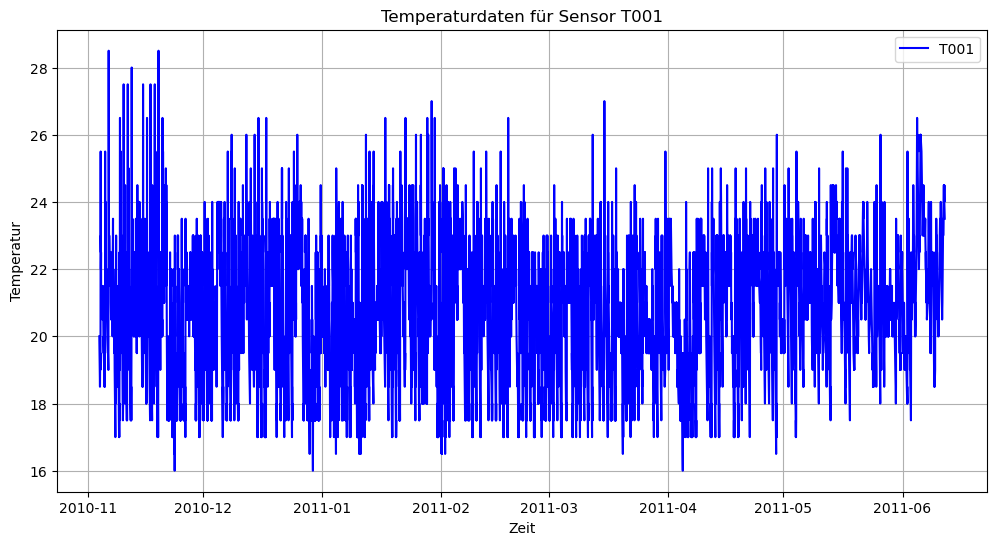

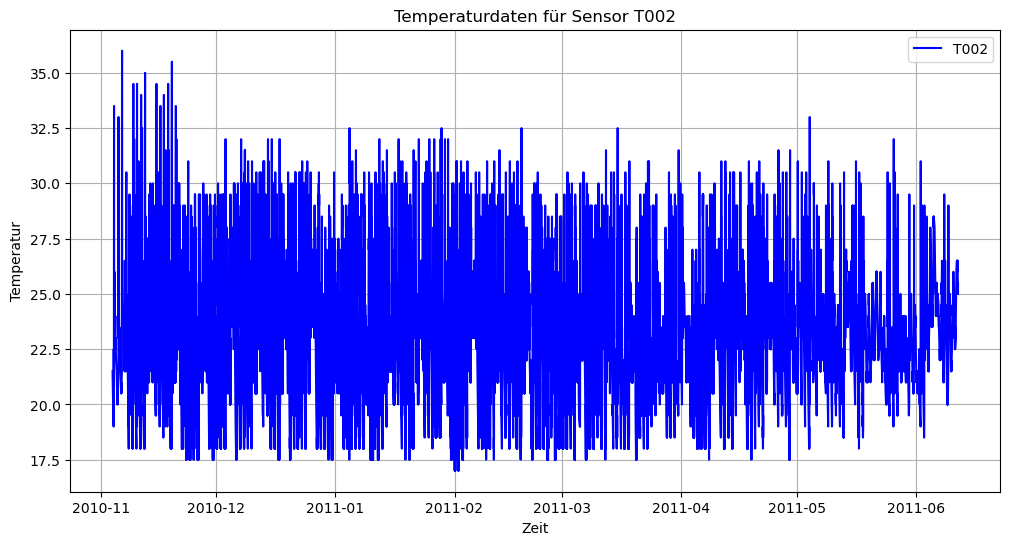

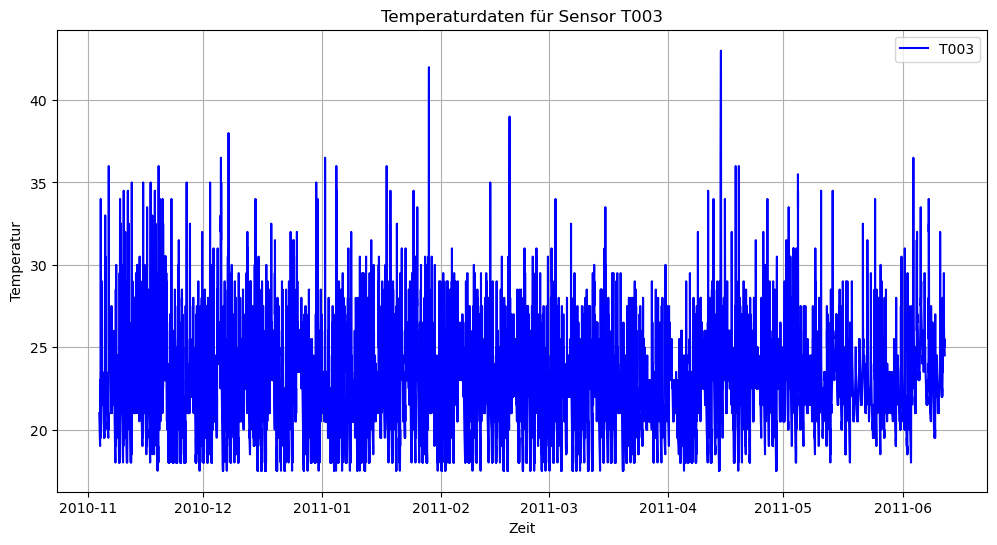

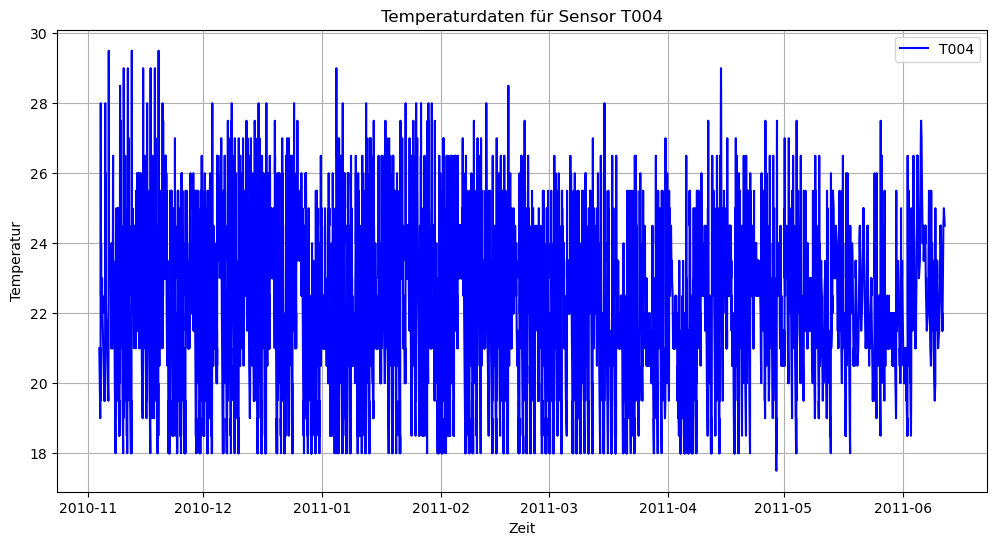

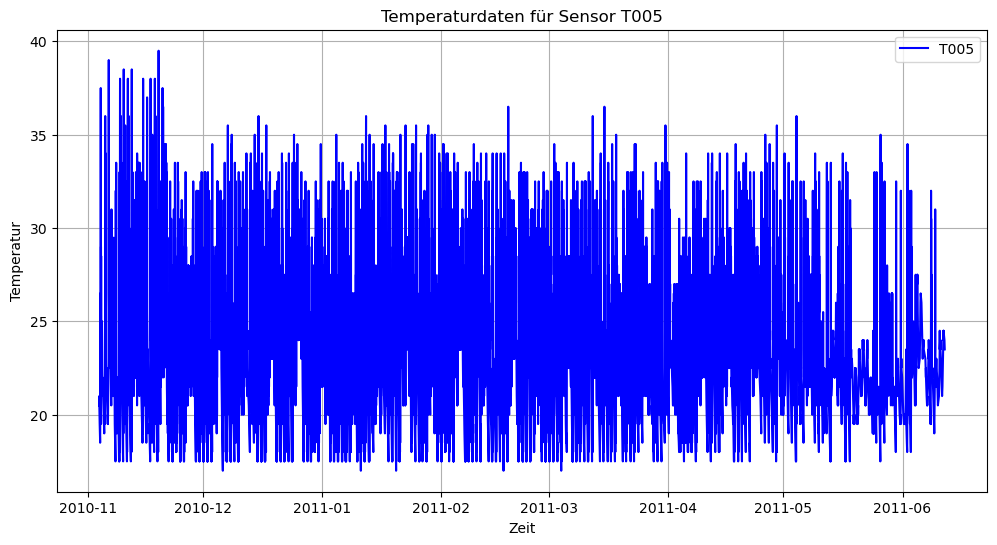

In [ ]:
# Schwellenwert für Ausreißer
outlier_threshold = 100

# Konvertiere Datum und Uhrzeit in eine einzige Spalte mit einem Datetime-Objekt
df_temperature_sensor["datetime"] = pd.to_datetime(df_temperature_sensor["date"] + " " + df_temperature_sensor["time"])


# Sortiere die Daten nach Datum und Uhrzeit
df_temperature_sensor = df_temperature_sensor.sort_values(by="datetime")

# Konvertiere die sensor_status-Spalte in numerische Werte
df_temperature_sensor["sensor_status"] = pd.to_numeric(df_temperature_sensor["sensor_status"], errors="coerce")

# Filtere Ausreißer
df_temperature_sensor = df_temperature_sensor.loc[df_temperature_sensor["sensor_status"] <= outlier_threshold]


# Erstelle eine Liste der einzigartigen Sensoren, sortiert nach der Nummer im Namen (z. B. T001 zuerst)
unique_sensors = df_temperature_sensor["sensor_type"].unique()
sorted_sensors = sorted(unique_sensors, key=lambda x: int(x[1:]))


# Erstelle ein Diagramm für jeden Temperatursensor
for sensor_id in sorted_sensors:
    # Daten für den aktuellen Sensor filtern
    sensor_data = df_temperature_sensor[df_temperature_sensor["sensor_type"] == sensor_id]

    # Neues Diagramm erstellen
    plt.figure(figsize=(12, 6))
    plt.plot(
        sensor_data["datetime"],
        sensor_data["sensor_status"],
        label=sensor_id,
        color="blue",
    )
    plt.title(f"Temperaturdaten für Sensor {sensor_id}")
    plt.xlabel("Zeit")
    plt.ylabel("Temperatur")
    plt.legend()
    plt.grid(True)
    plt.show()

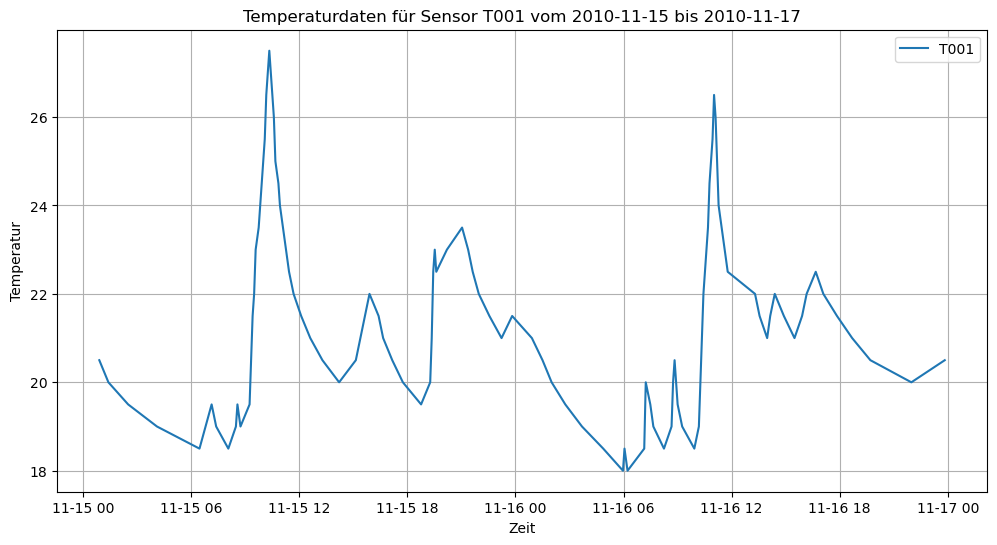

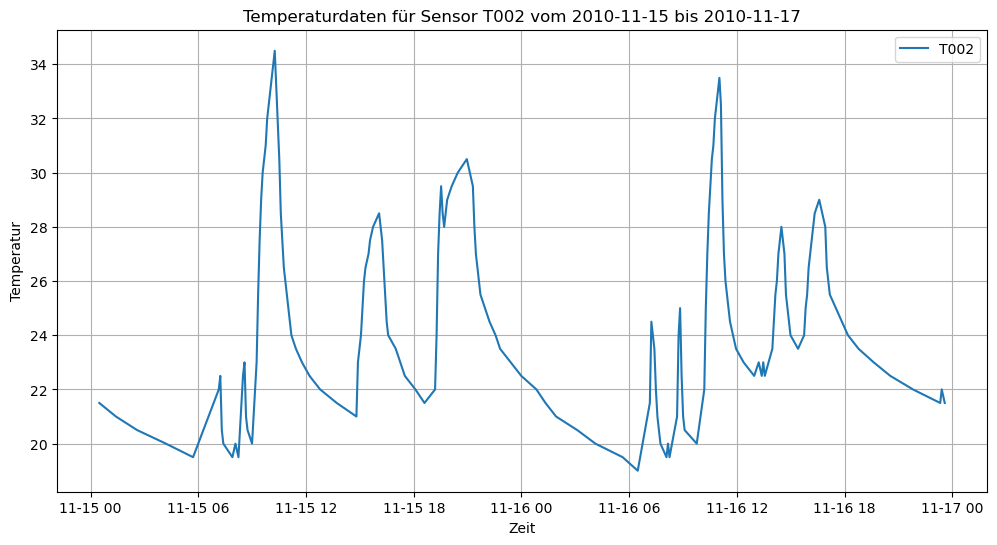

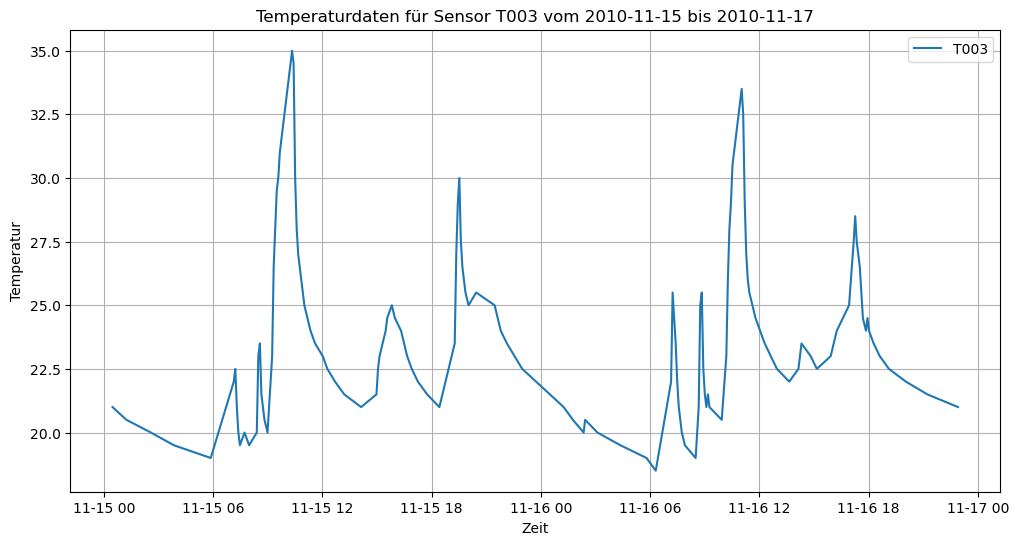

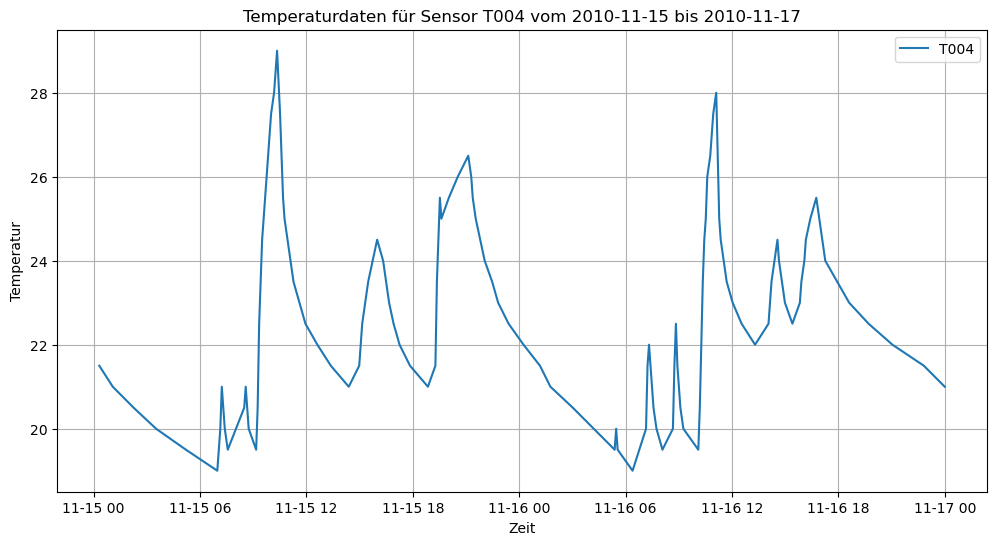

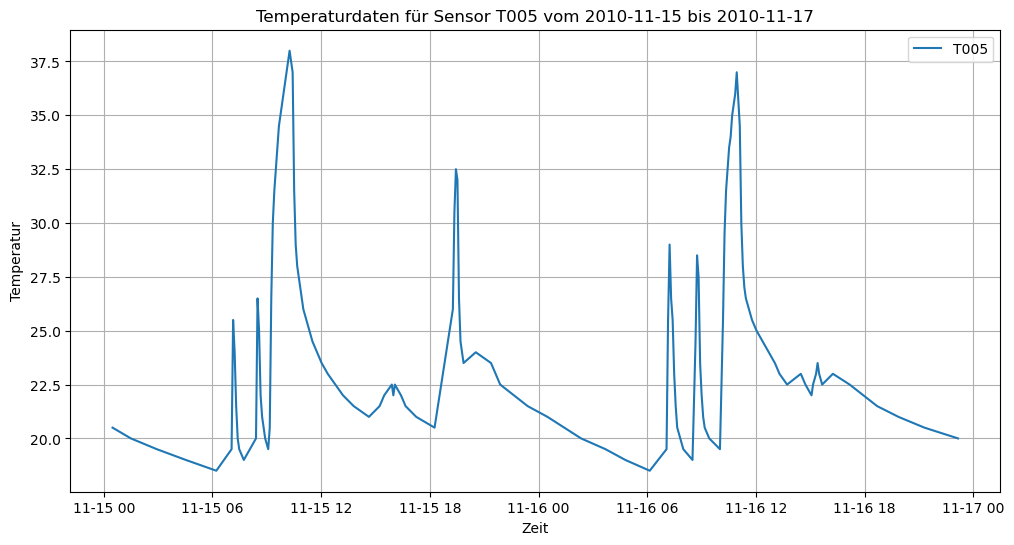

In [ ]:
# Zeitspanne für Filterung angeben
start_date = "2010-11-15"
end_date = "2010-11-17"

# Konvertiere Datum und Uhrzeit in eine einzige Spalte mit einem Datetime-Objekt
df_temperature_sensor["datetime"] = pd.to_datetime(df_temperature_sensor["date"] + " " + df_temperature_sensor["time"])

# Konvertiere die sensor_status-Spalte in numerische Werte
df_temperature_sensor["sensor_status"] = pd.to_numeric(df_temperature_sensor["sensor_status"], errors="coerce")

# Filtere die Daten für die ausgewählte Zeitspanne
filtered_data = df_temperature_sensor[
    (df_temperature_sensor["datetime"] >= pd.to_datetime(start_date))
    & (df_temperature_sensor["datetime"] <= pd.to_datetime(end_date))
]

# Sortiere die gefilterten Daten
filtered_data = filtered_data.sort_values(by="datetime")

# Erstelle eine Liste der einzigartigen Sensoren, sortiert nach der Nummer im Namen (z. B. T001 zuerst)
unique_sensors = filtered_data["sensor_type"].unique()
sorted_sensors = sorted(unique_sensors, key=lambda x: int(x[1:]))  # Sortiere basierend auf der Zahl nach dem 'T'
# Erstelle ein Diagramm für jeden Temperatursensor in der sortierten Reihenfolge
for sensor_id in sorted_sensors:
    # Daten für den aktuellen Sensor filtern
    sensor_data = filtered_data[filtered_data["sensor_type"] == sensor_id]

    # Neues Diagramm erstellen
    plt.figure(figsize=(12, 6))
    plt.plot(sensor_data["datetime"], sensor_data["sensor_status"], label=sensor_id)
    plt.title(f"Temperaturdaten für Sensor {sensor_id} vom {start_date} bis {end_date}")
    plt.xlabel("Zeit")
    plt.ylabel("Temperatur")
    plt.legend()
    plt.grid(True)
    plt.show()

/tmp/ipykernel_734/3531626111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_door_closure_sensor["datetime"] = pd.to_datetime(


date             time sensor_type sensor_status meta  \
900      2010-11-04  09:26:55.872002        D002          OPEN  NaN   
910      2010-11-04   09:27:24.02731        D002         CLOSE  NaN   
1050     2010-11-04  09:44:45.825736        D004          OPEN  NaN   
1056     2010-11-04  09:46:07.572698        D004         CLOSE  NaN   
2330     2010-11-04  11:41:11.940985        D001          OPEN  NaN   
...             ...              ...         ...           ...  ...   
1717184  2011-06-11  15:49:27.091821        D002         CLOSE  NaN   
1718385  2011-06-11  17:44:41.225887        D004          OPEN  NaN   
1718394  2011-06-11  17:46:01.260041        D004         CLOSE  NaN   
1719354  2011-06-11  21:18:22.395177        D004          OPEN  NaN   
1719356  2011-06-11  21:18:27.693799        D004         CLOSE  NaN   

        meta_begin_end                   datetime  
900                NaN 2010-11-04 09:26:55.872002  
910                NaN 2010-11-04 09:27:24.027310  
1050               NaN 2010-11-04 09:44:45.825736  
1056               NaN 2010-11-04 09:46:07.572698  
2330               NaN 2010-11-04 11:41:11.940985  
...                ...                        ...  
1717184            NaN 2011-06-11 15:49:27.091821  
1718385            NaN 2011-06-11 17:44:41.225887  
1718394            NaN 2011-06-11 17:46:01.260041  
1719354            NaN 2011-06-11 21:18:22.395177  
1719356            NaN 2011-06-11 21:18:27.693799  

[6836 rows x 7 columns]

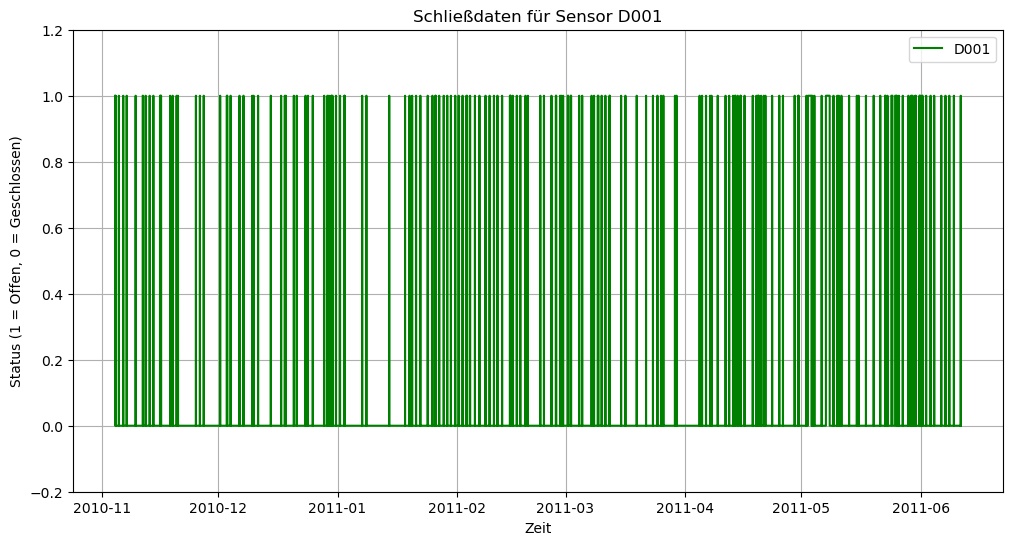

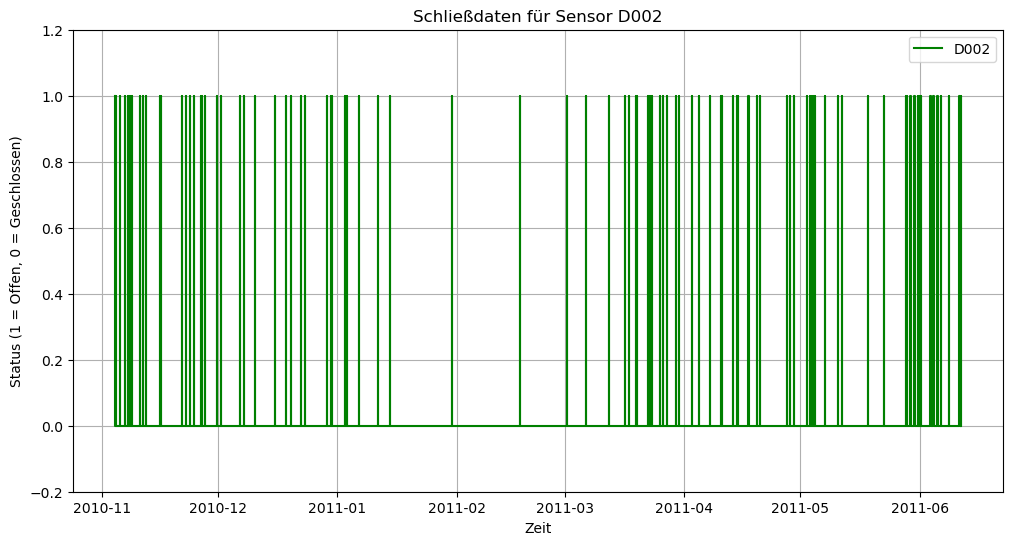

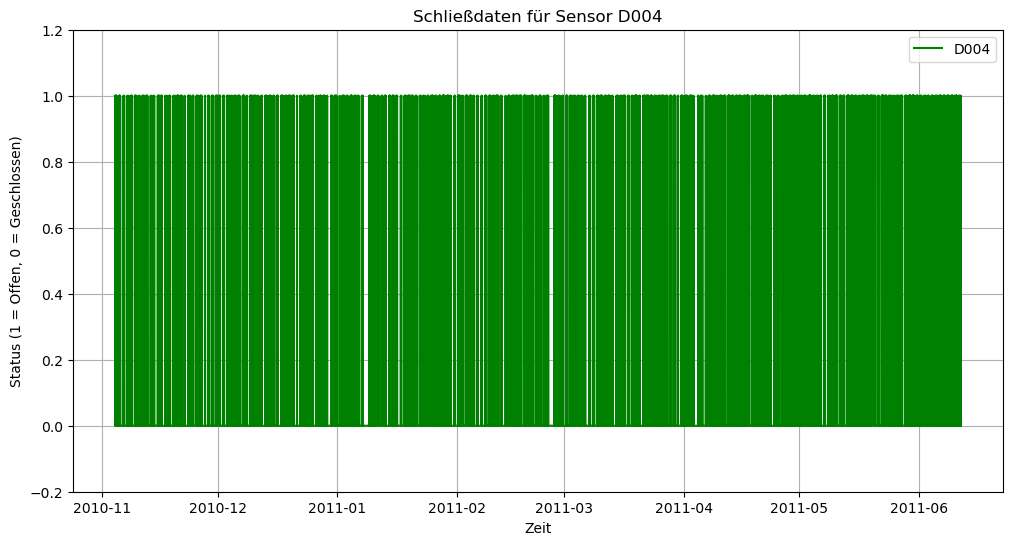

In [ ]:
# Konvertiere Datum und Uhrzeit in eine einzige Spalte mit einem Datetime-Objekt
df_door_closure_sensor["datetime"] = pd.to_datetime(
    df_door_closure_sensor["date"] + " " + df_door_closure_sensor["time"]
)

# Sortiere die Daten nach Datum und Uhrzeit
df_door_closure_sensor = df_door_closure_sensor.sort_values(by="datetime")
display(df_door_closure_sensor)

# Konvertiere sensor_status von OPEN/CLOSE zu numerischen Werten
status_mapping = {"OPEN": 1, "CLOSE": 0}
df_door_closure_sensor["sensor_status_numeric"] = df_door_closure_sensor["sensor_status"].map(status_mapping)

# Erstelle eine Liste der einzigartigen Sensoren, sortiert nach der Nummer im Namen (z. B. D001 zuerst)
unique_sensors = df_door_closure_sensor["sensor_type"].unique()
sorted_sensors = sorted(unique_sensors, key=lambda x: int(x[1:]))

# Erstelle ein Diagramm für jeden Türschließsensor
for sensor_id in sorted_sensors:
    # Daten für den aktuellen Sensor filtern
    sensor_data = df_door_closure_sensor[df_door_closure_sensor["sensor_type"] == sensor_id]

    # Neues Diagramm erstellen
    plt.figure(figsize=(12, 6))
    plt.step(
        sensor_data["datetime"],
        sensor_data["sensor_status_numeric"],
        where="post",
        label=sensor_id,
        color="green",
    )
    plt.title(f"Schließdaten für Sensor {sensor_id}")
    plt.xlabel("Zeit")
    plt.ylabel("Status (1 = Offen, 0 = Geschlossen)")
    plt.ylim(-0.2, 1.2)  # Setze die Grenzen der y-Achse für bessere Lesbarkeit
    plt.legend()
    plt.grid(True)
    plt.show()

/tmp/ipykernel_734/2812579121.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["sensor_status_numeric"] = filtered_data["sensor_status"].map(


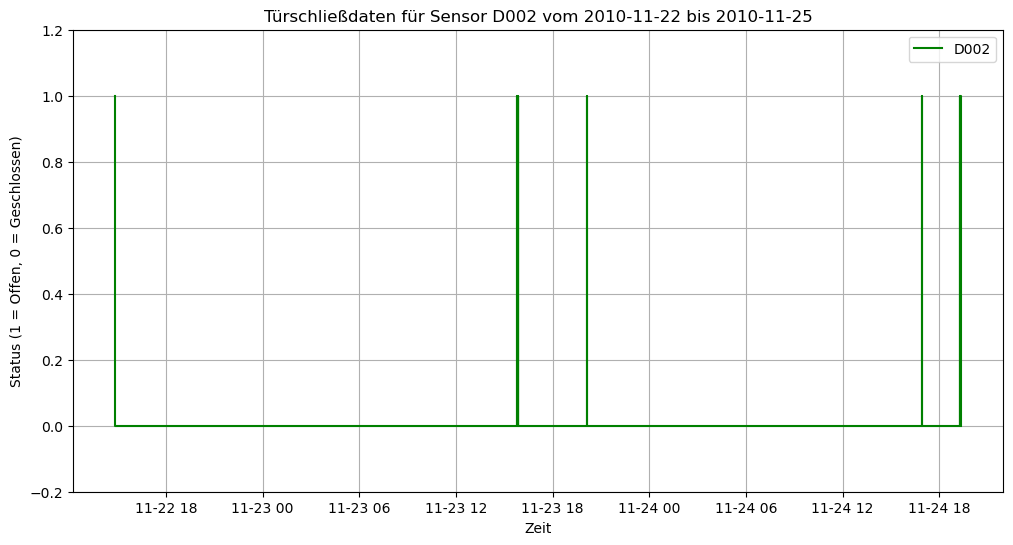

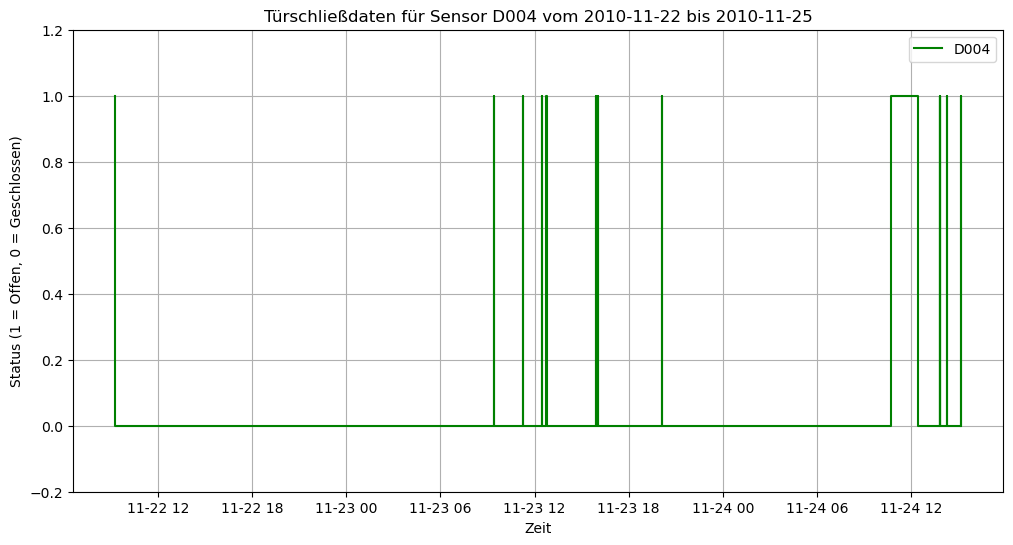

In [ ]:
# Zeitspanne angeben
start_date = "2010-11-22"
end_date = "2010-11-25"

# Konvertiere Datum und Uhrzeit in eine einzige Spalte mit einem Datetime-Objekt
df_door_closure_sensor["datetime"] = pd.to_datetime(
    df_door_closure_sensor["date"] + " " + df_door_closure_sensor["time"],
    format="ISO8601",
)

# Filtere die Daten für die angegebene Zeitspanne
filtered_data = df_door_closure_sensor[
    (df_door_closure_sensor["datetime"] >= pd.to_datetime(start_date))
    & (df_door_closure_sensor["datetime"] <= pd.to_datetime(end_date))
]
# Konvertiere sensor_status von OPEN/CLOSE zu numerischen Werten
status_mapping = {"OPEN": 1, "CLOSE": 0}
filtered_data["sensor_status_numeric"] = filtered_data["sensor_status"].map(status_mapping)

# Sortiere die Daten nach Datum und Uhrzeit
filtered_data = filtered_data.sort_values(by="datetime")

# Erstelle eine Liste der einzigartigen Sensoren, sortiert nach der Nummer im Namen (z. B. D001 zuerst)
unique_sensors = filtered_data["sensor_type"].unique()
sorted_sensors = sorted(unique_sensors, key=lambda x: int(x[1:]))

# Erstelle ein Diagramm für jeden Türschließsensor in der angegebenen Zeitspanne
for sensor_id in sorted_sensors:
    # Daten für den aktuellen Sensor filtern
    sensor_data = filtered_data[filtered_data["sensor_type"] == sensor_id]

    # Neues Diagramm erstellen
    plt.figure(figsize=(12, 6))
    plt.step(
        sensor_data["datetime"],
        sensor_data["sensor_status_numeric"],
        where="post",
        label=sensor_id,
        color="green",
    )
    # display(sensor_data['datetime'])
    plt.title(f"Türschließdaten für Sensor {sensor_id} vom {start_date} bis {end_date}")
    plt.xlabel("Zeit")
    plt.ylabel("Status (1 = Offen, 0 = Geschlossen)")
    plt.ylim(-0.2, 1.2)  # Setze die Grenzen der y-Achse für bessere Lesbarkeit
    plt.legend()
    plt.grid(True)
    plt.show()

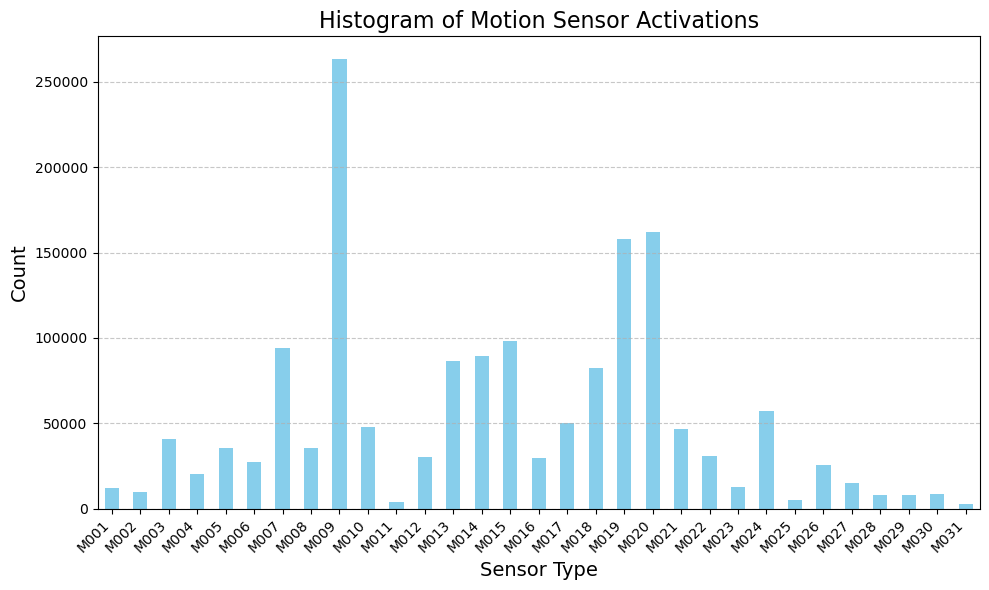

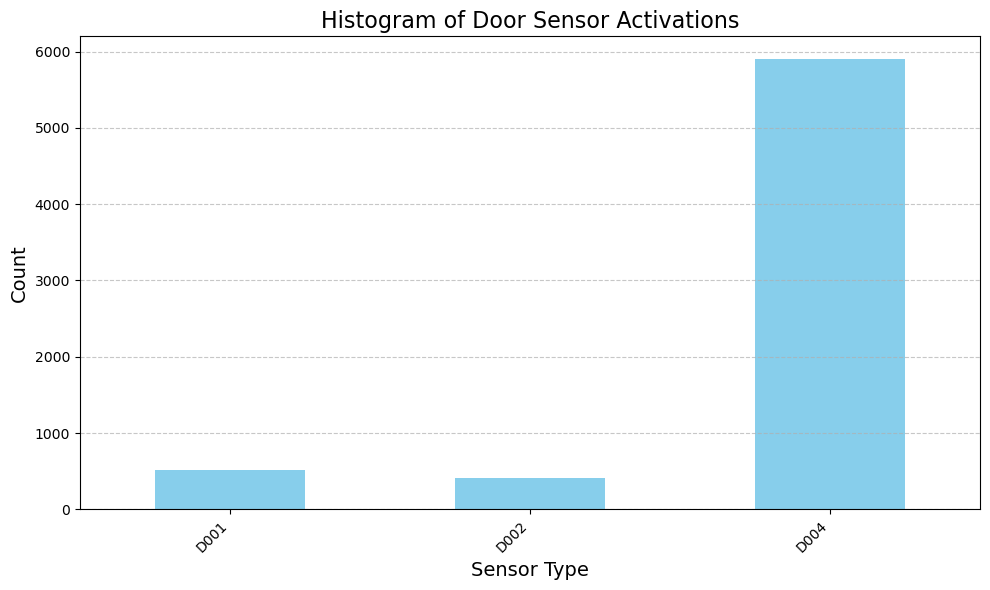

In [ ]:
# Histogramm
# Plot histogram for the simulated df_motion_sensor
plt.figure(figsize=(10, 6))
motion_sensor_counts = df_motion_sensor["sensor_type"].value_counts().sort_index()
motion_sensor_counts.plot(kind="bar", color="skyblue")
plt.title("Histogram of Motion Sensor Activations", fontsize=16)
plt.xlabel("Sensor Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
# Plot histogram for the simulated df_motion_sensor
plt.figure(figsize=(10, 6))
door_sensor_counts = df_door_closure_sensor["sensor_type"].value_counts().sort_index()
door_sensor_counts.plot(kind="bar", color="skyblue")
plt.title("Histogram of Door Sensor Activations", fontsize=16)
plt.xlabel("Sensor Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipykernel_734/2927975763.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_motion_sensor["datetime"] = pd.to_datetime(


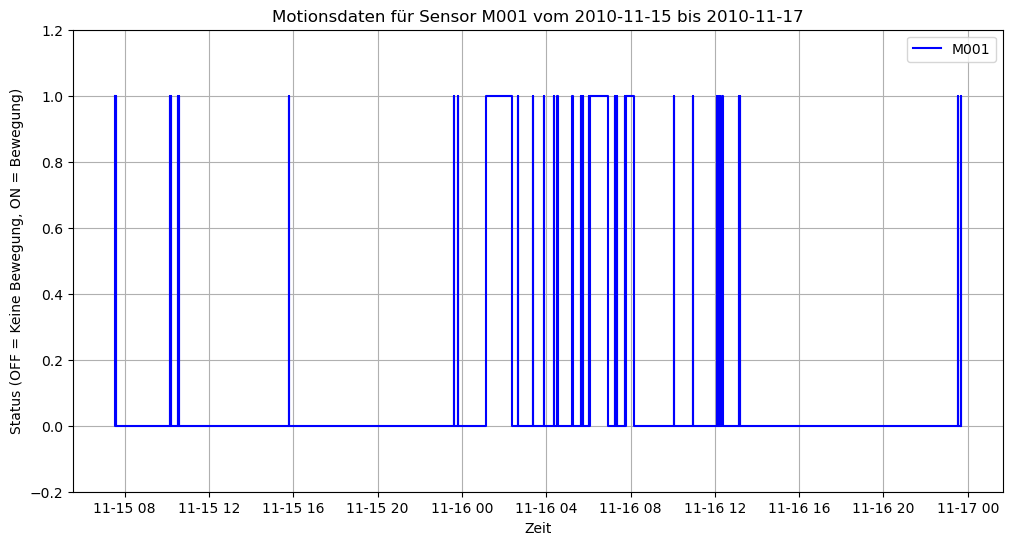

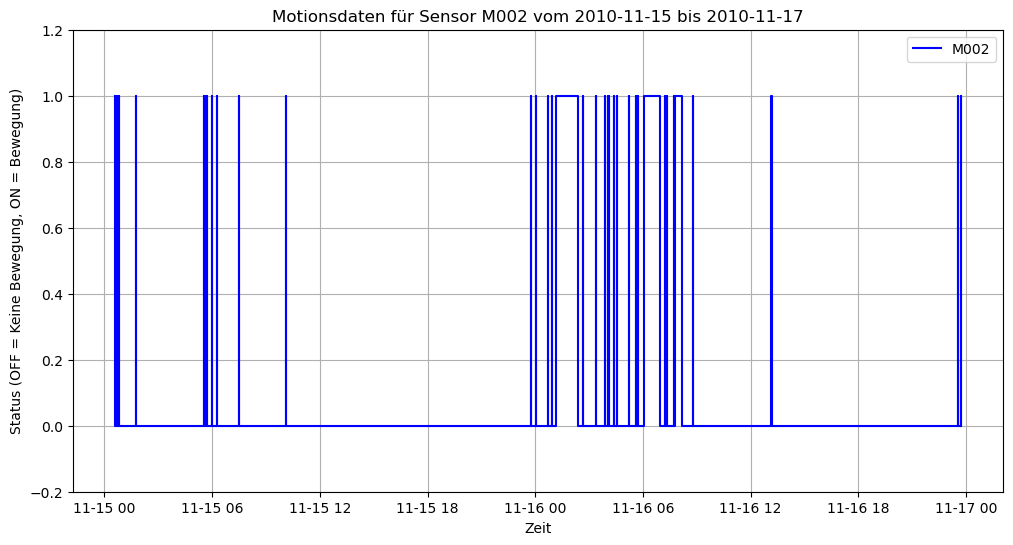

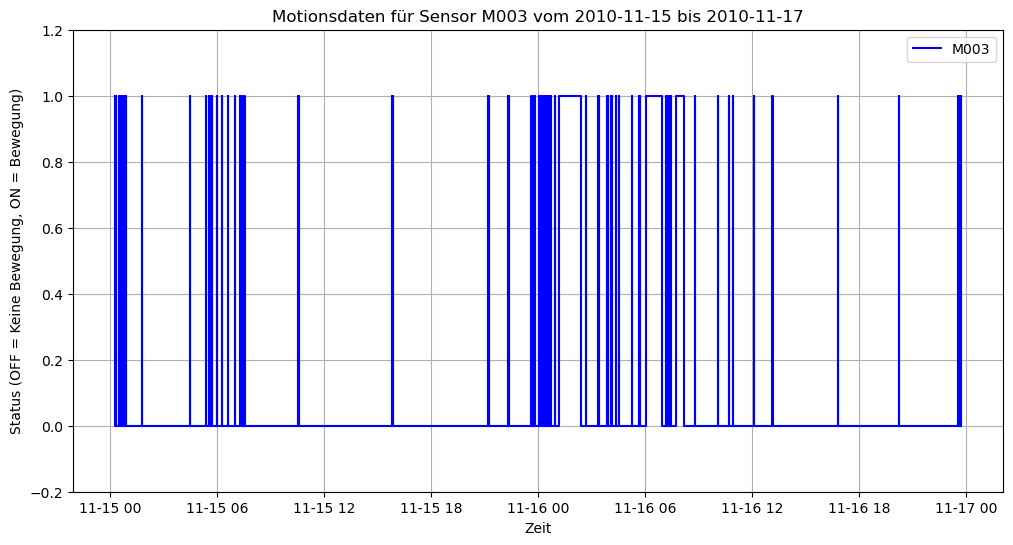

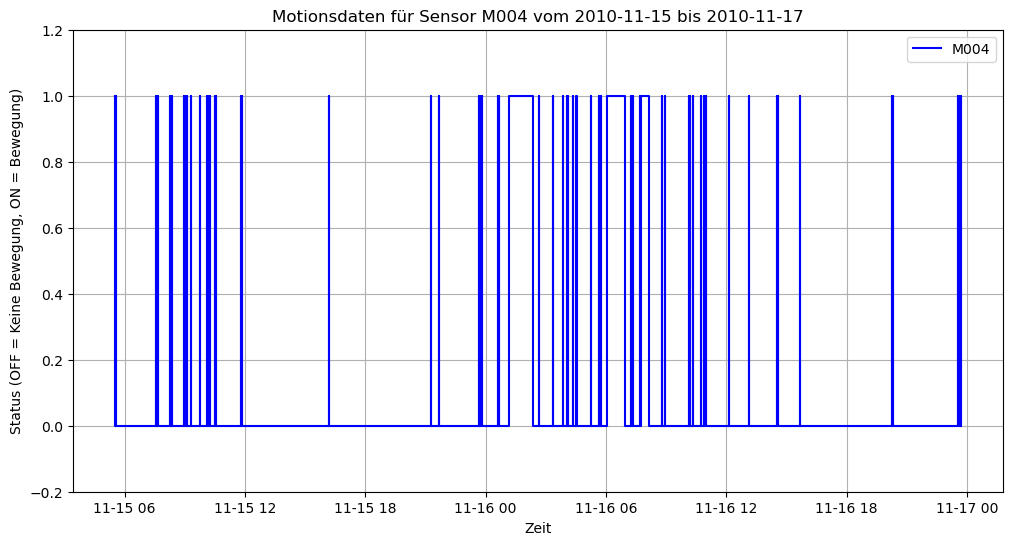

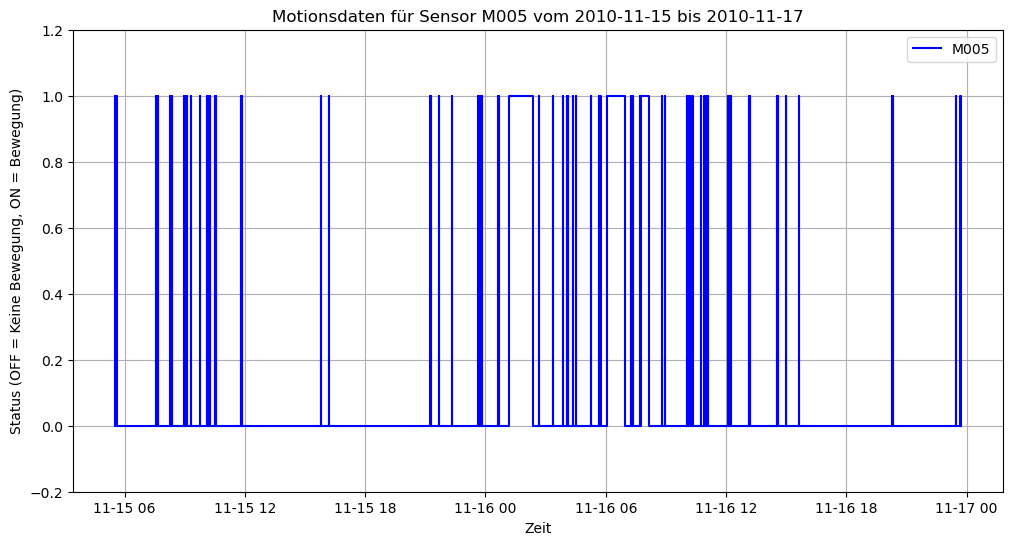

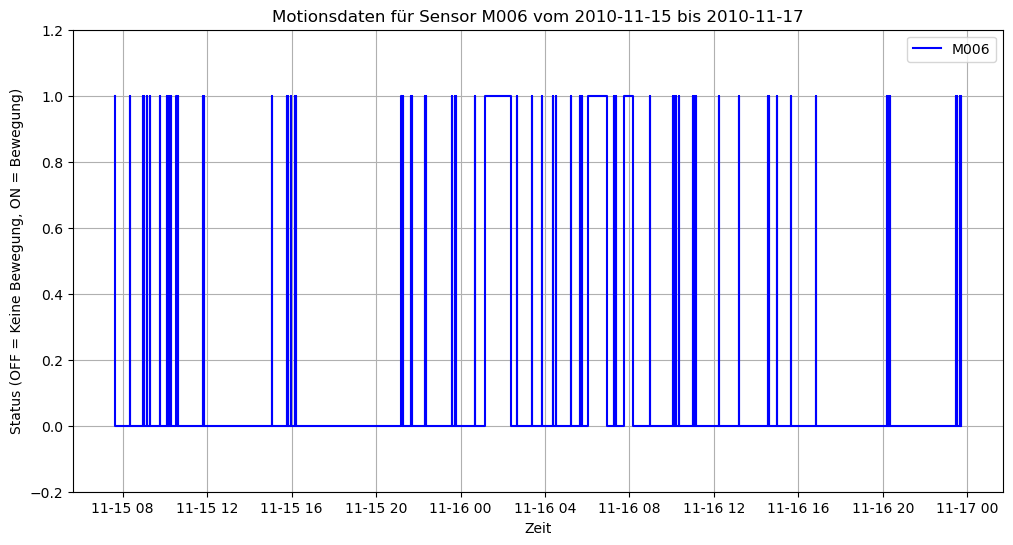

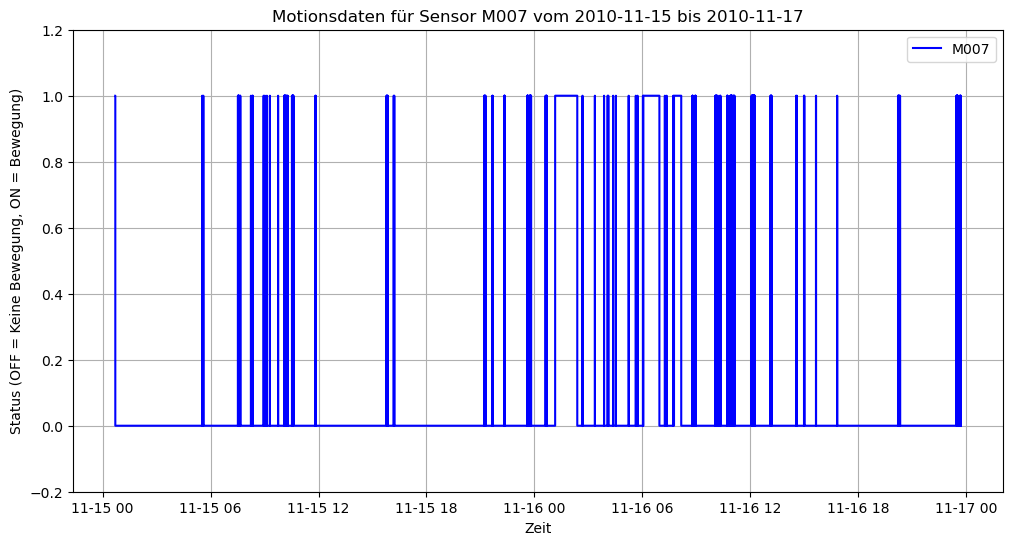

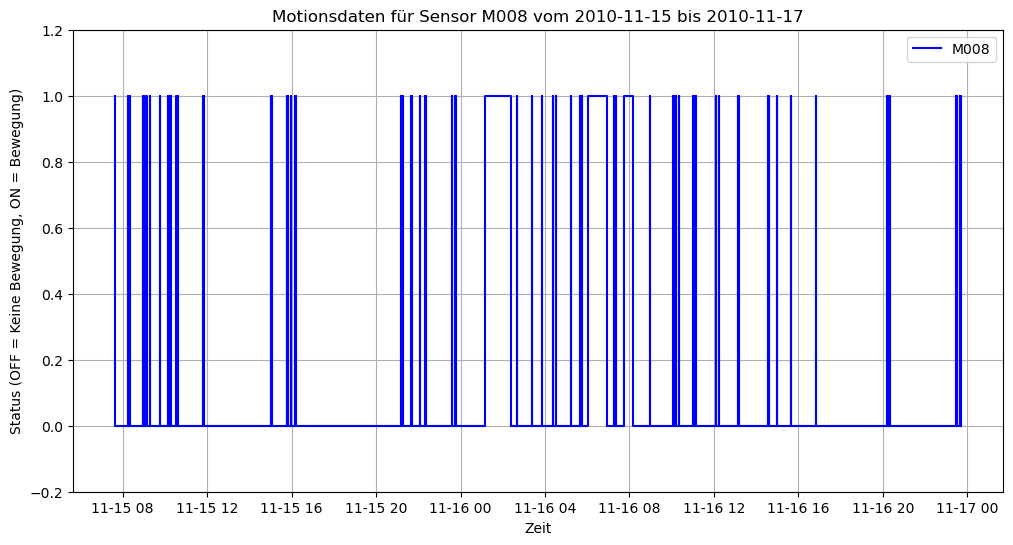

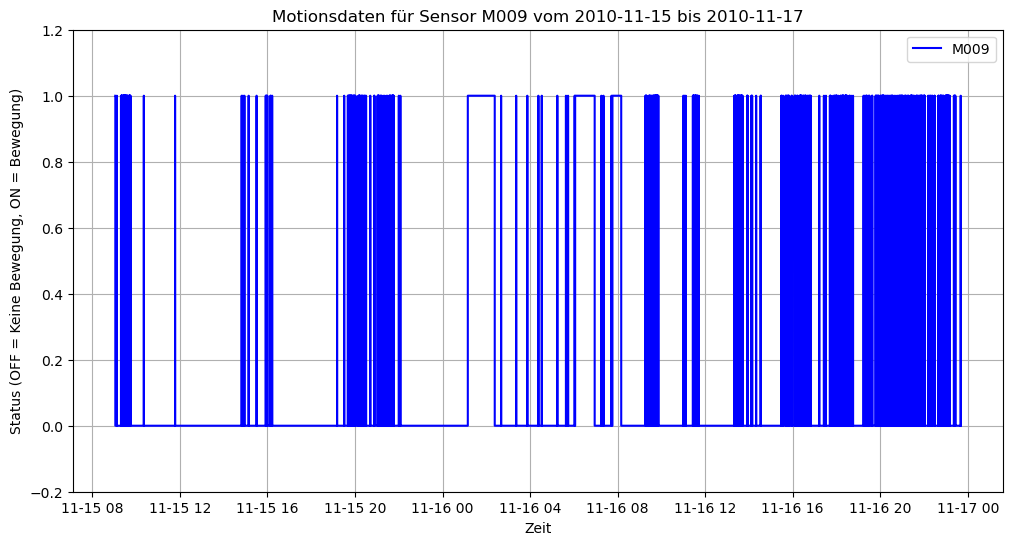

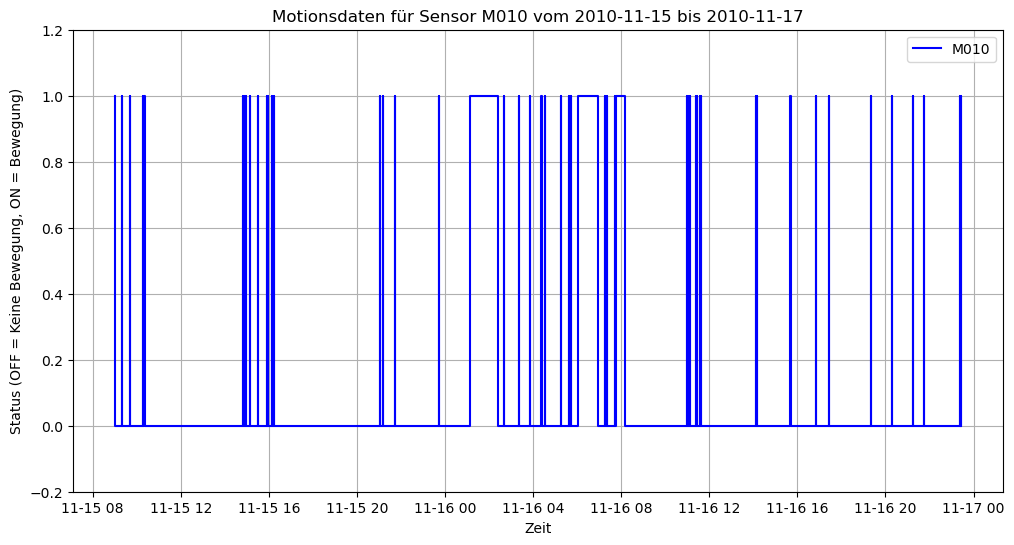

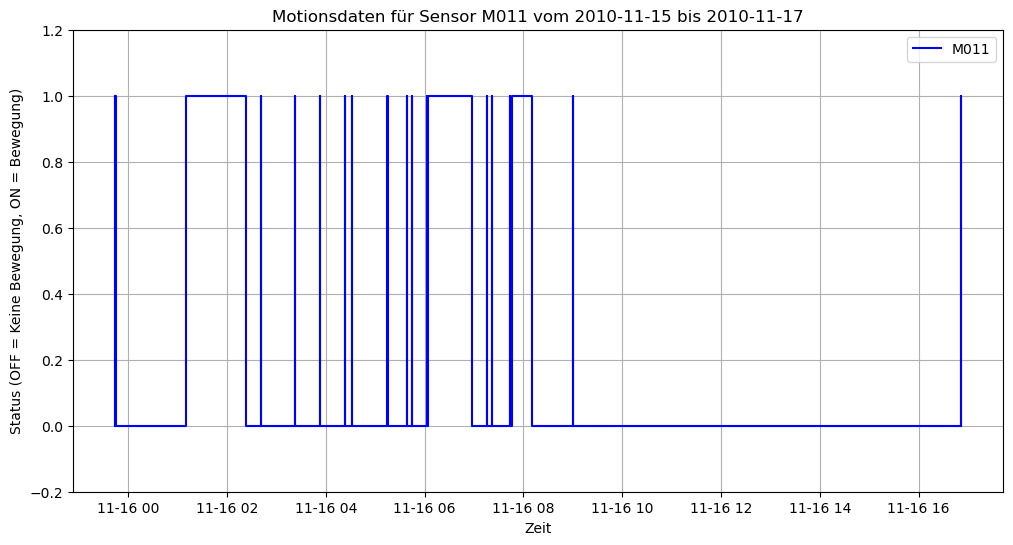

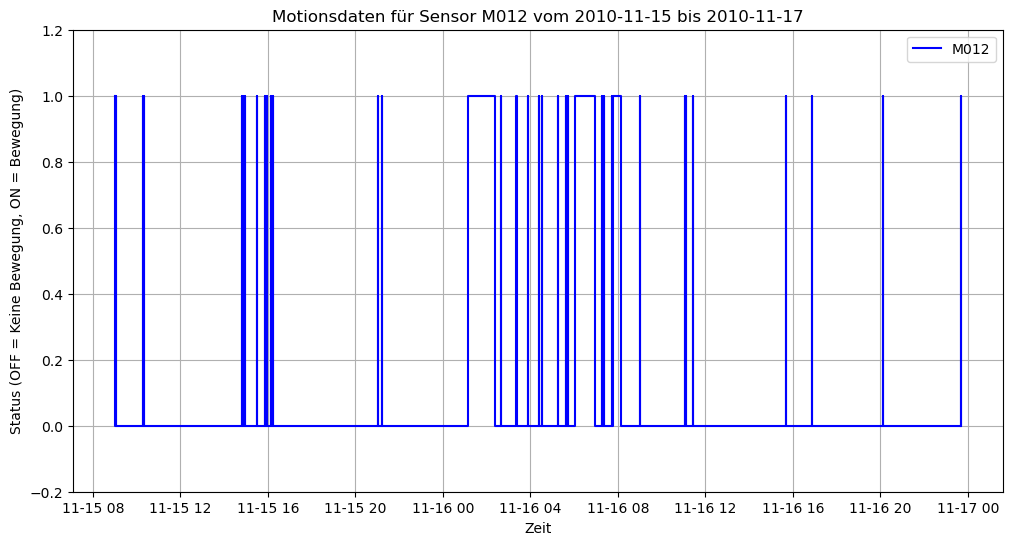

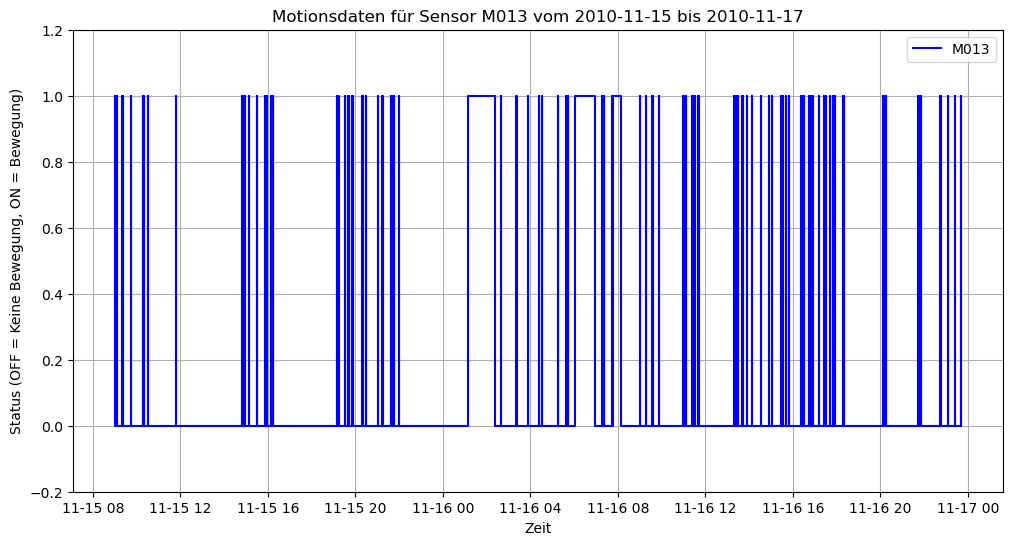

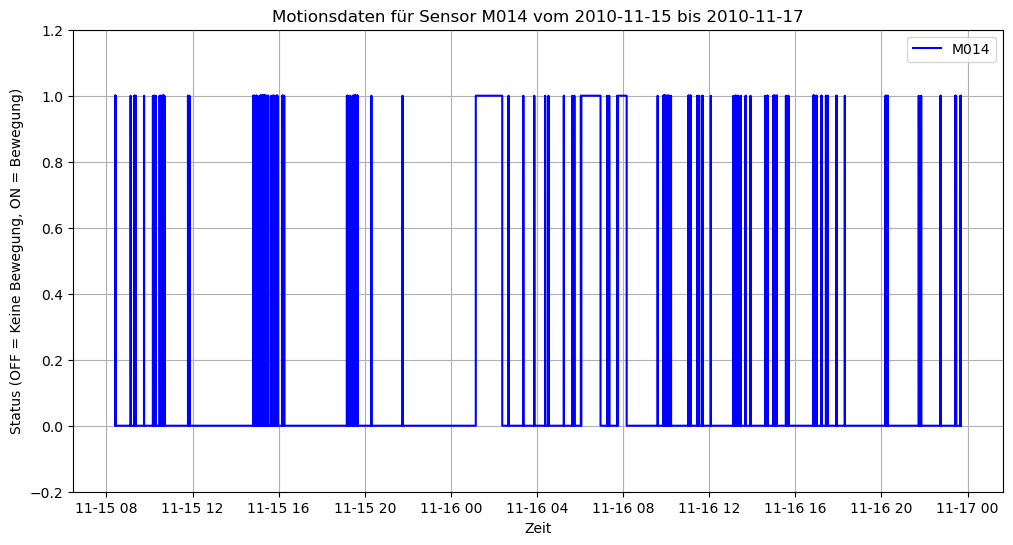

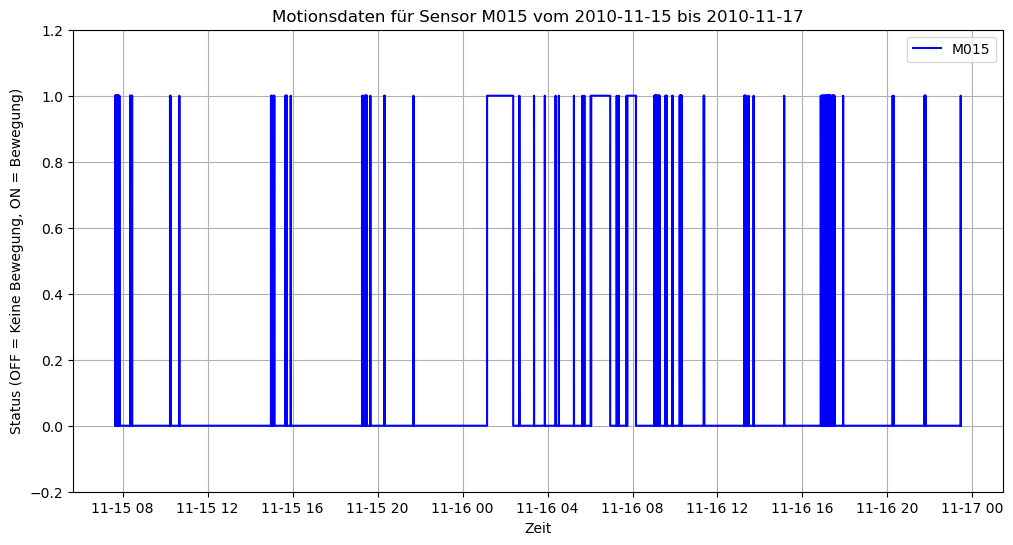

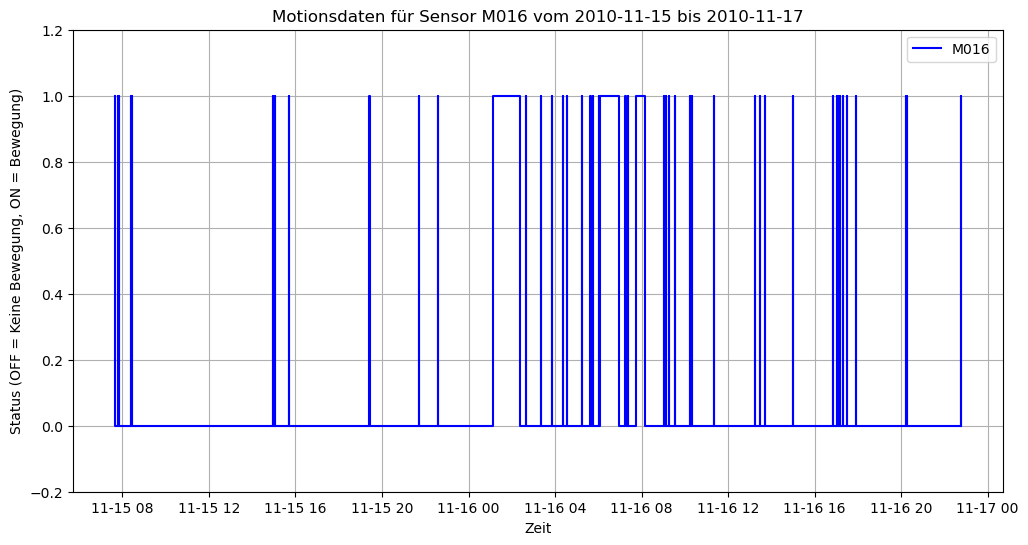

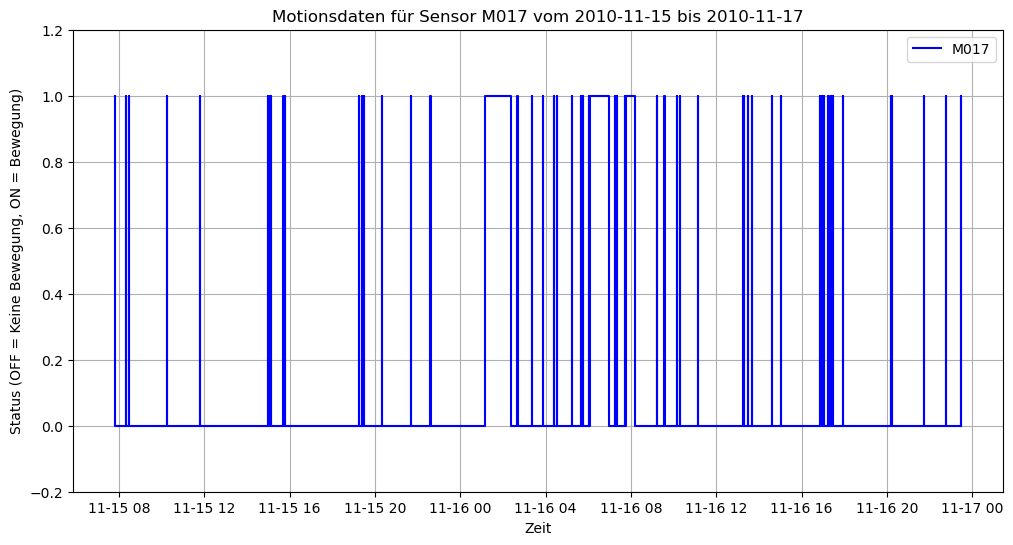

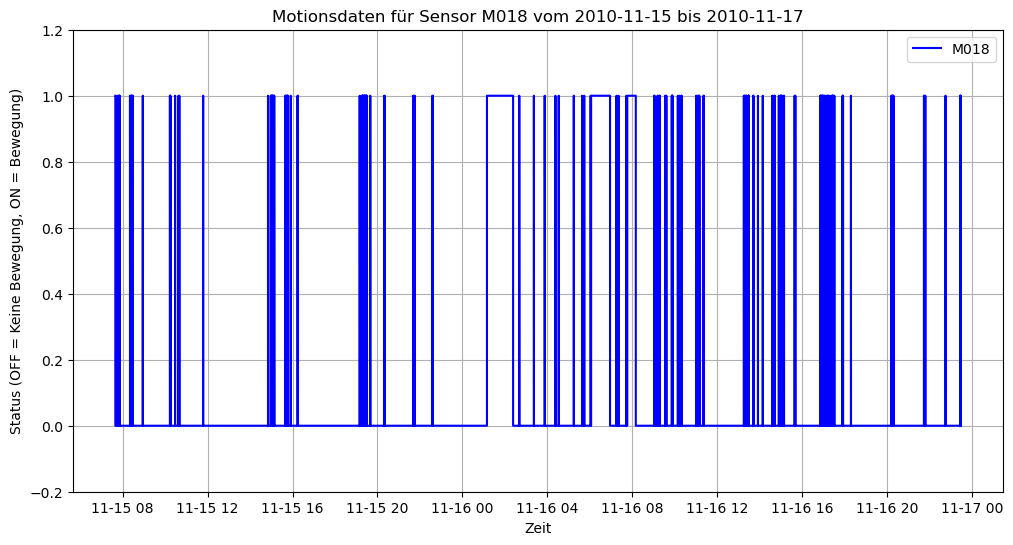

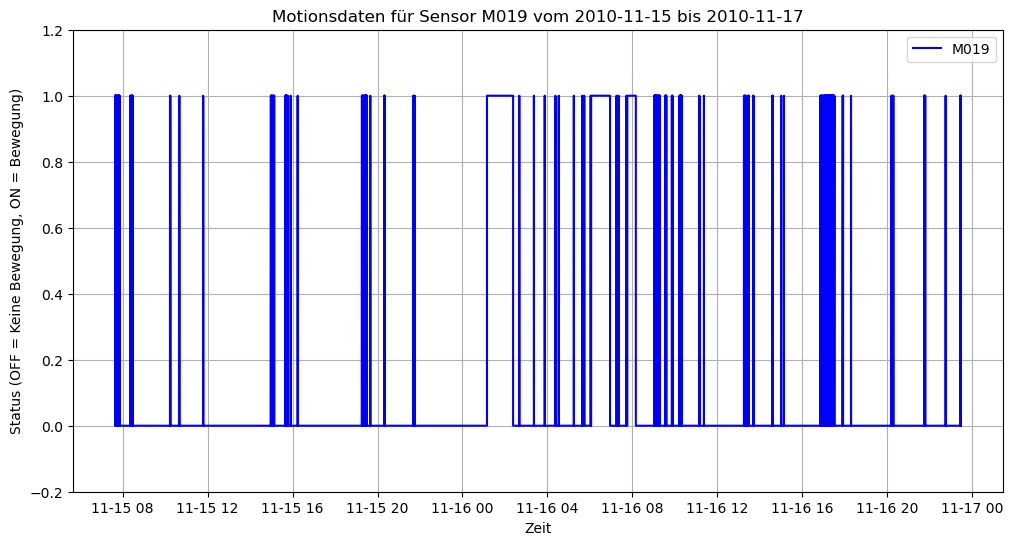

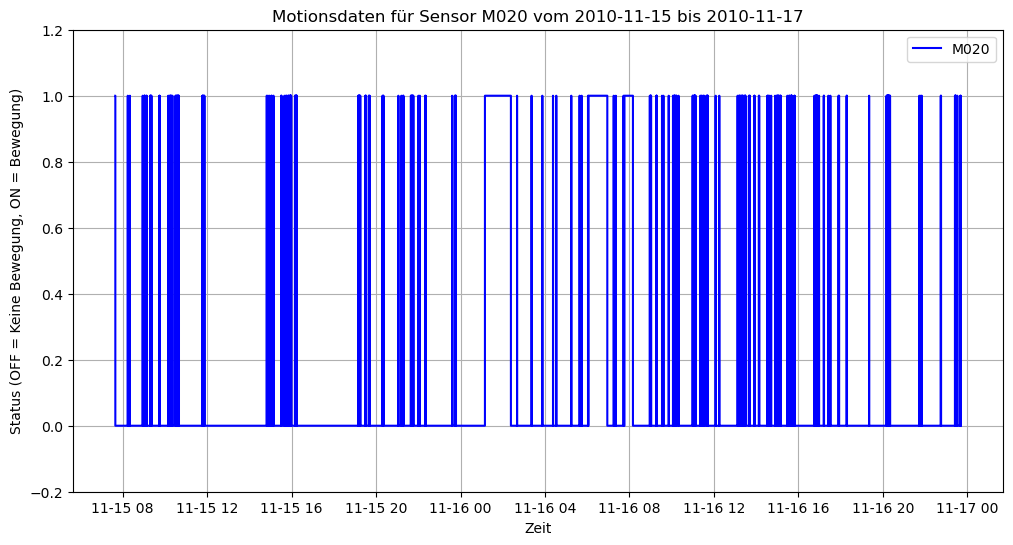

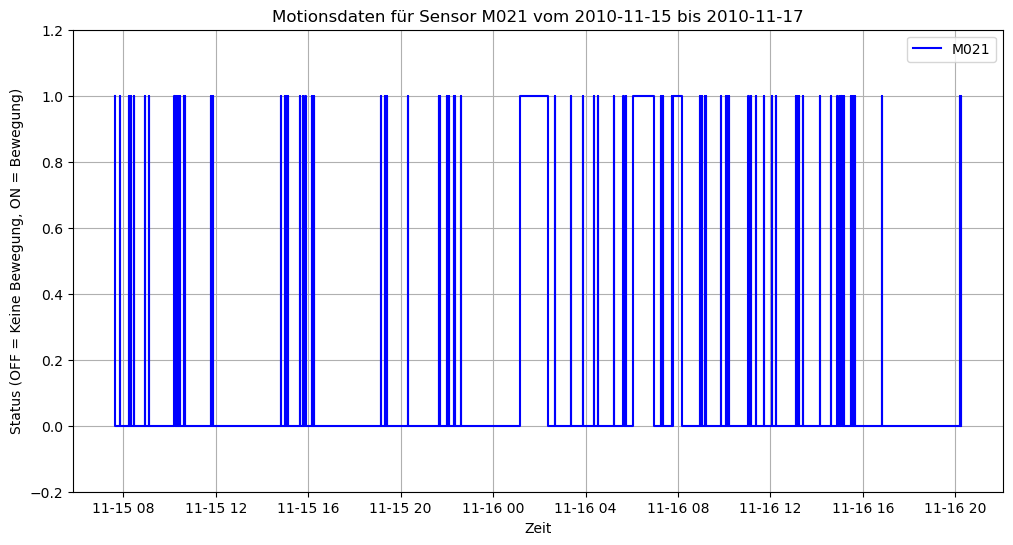

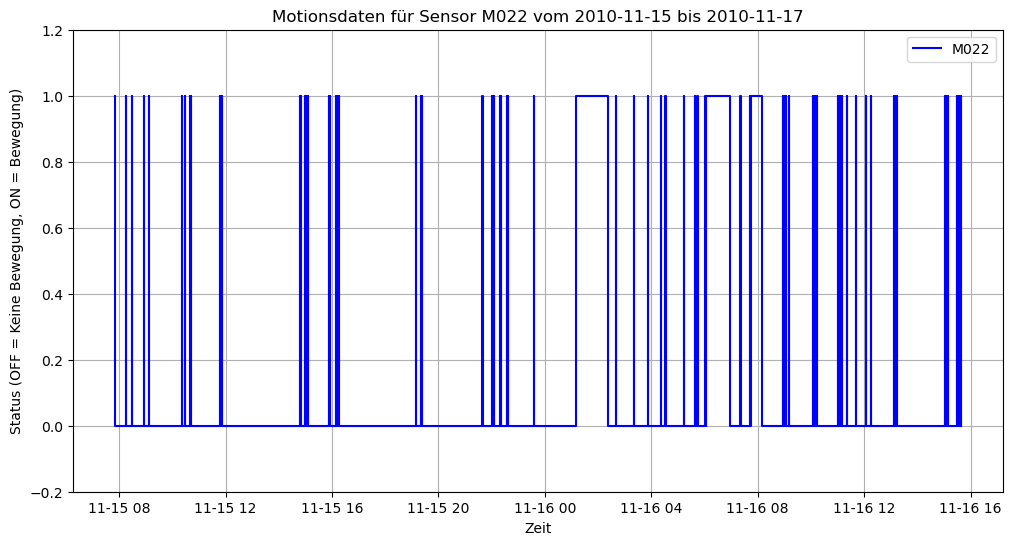

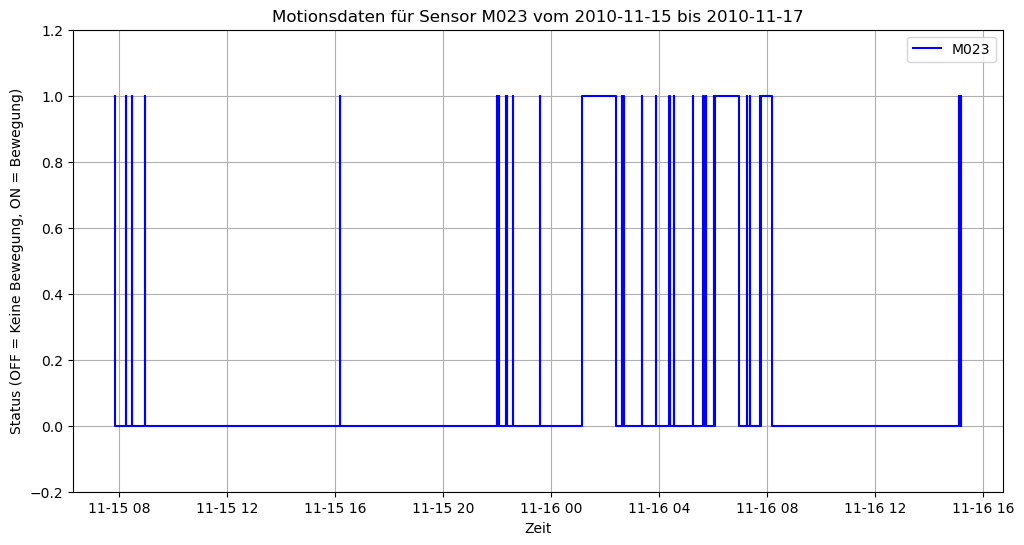

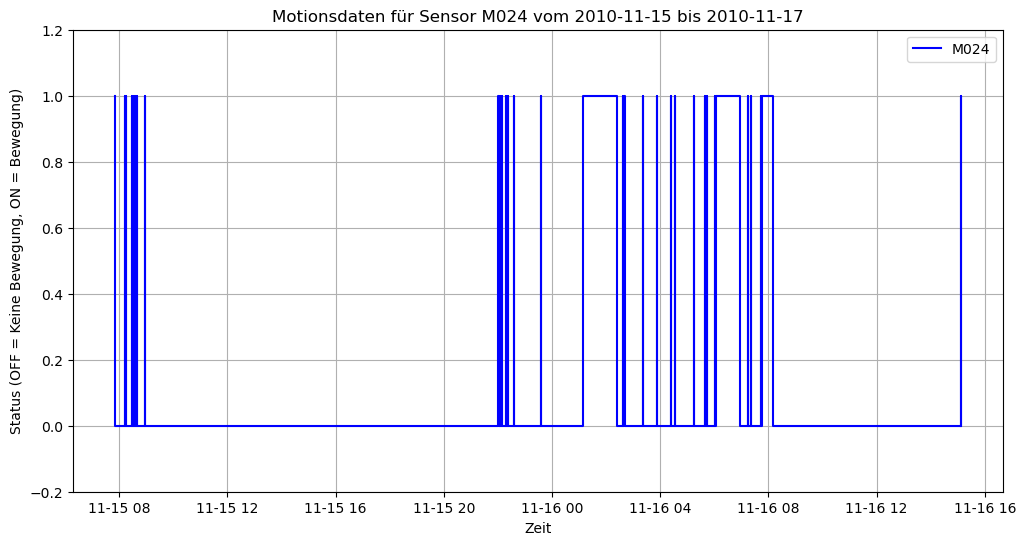

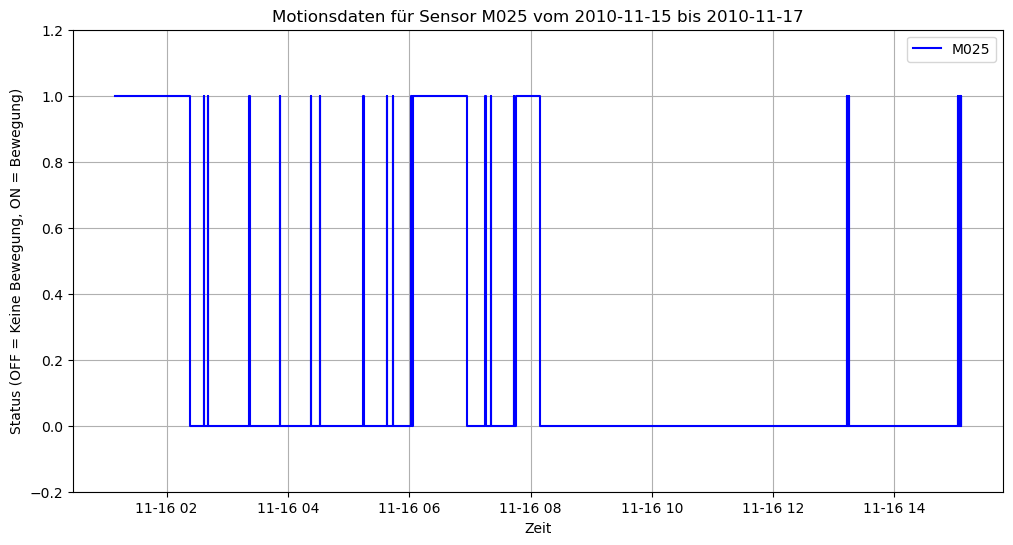

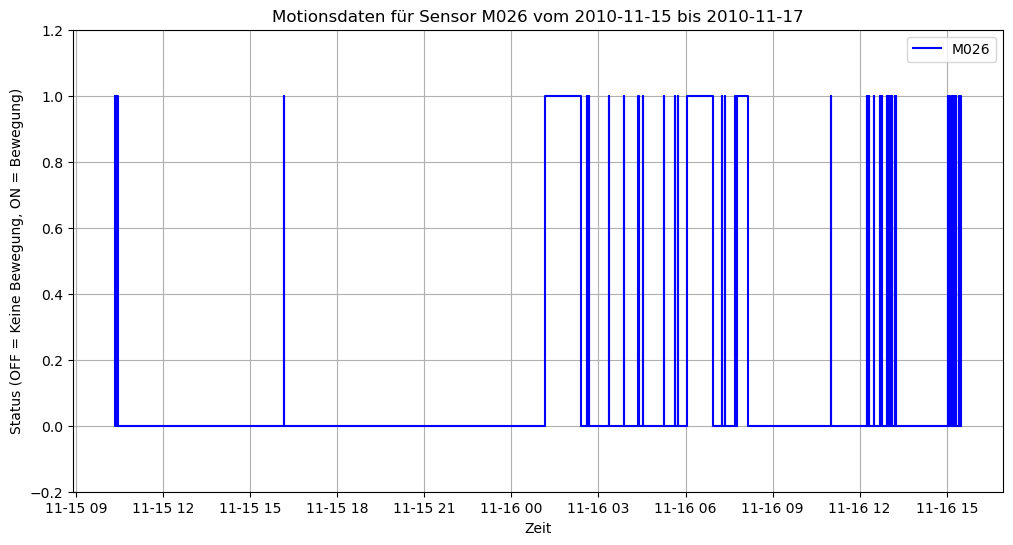

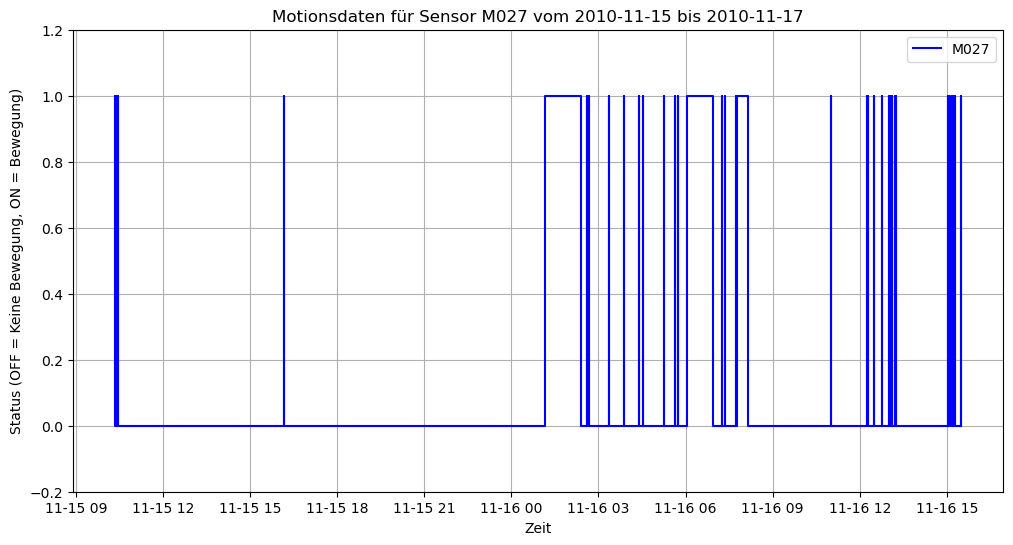

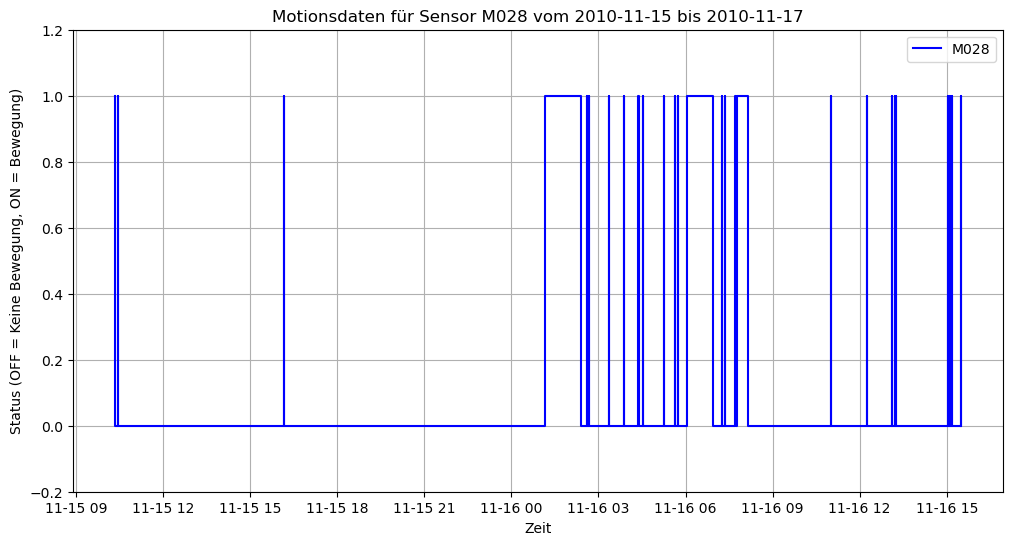

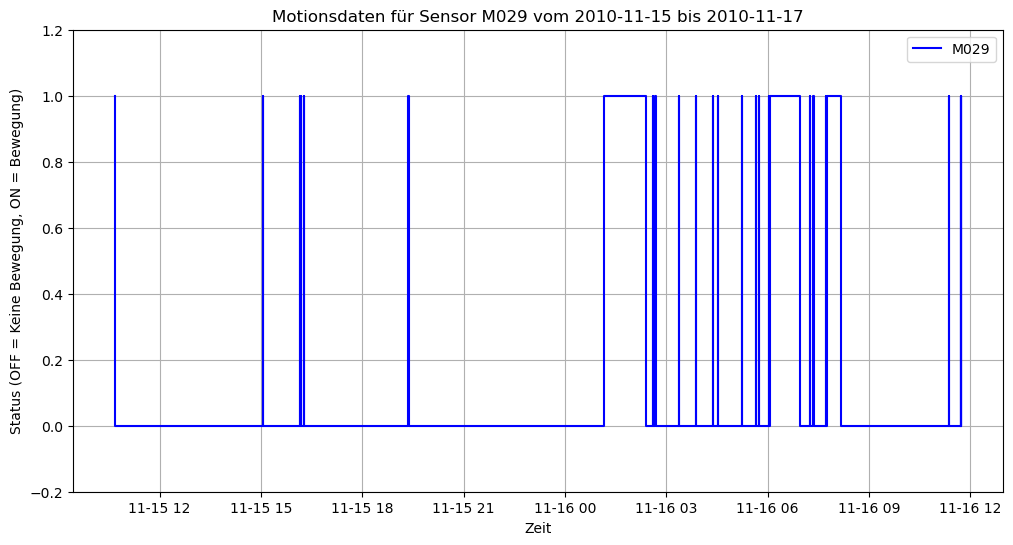

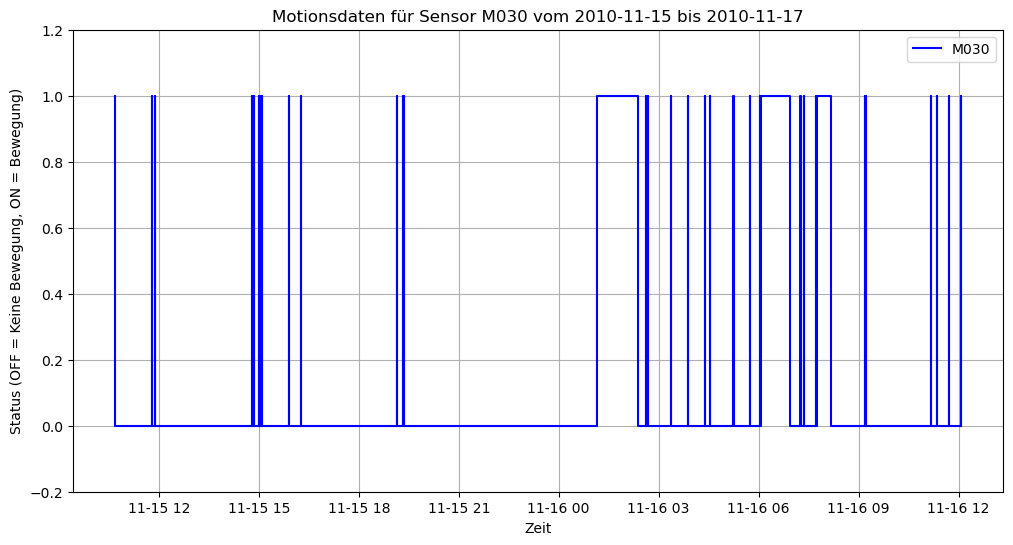

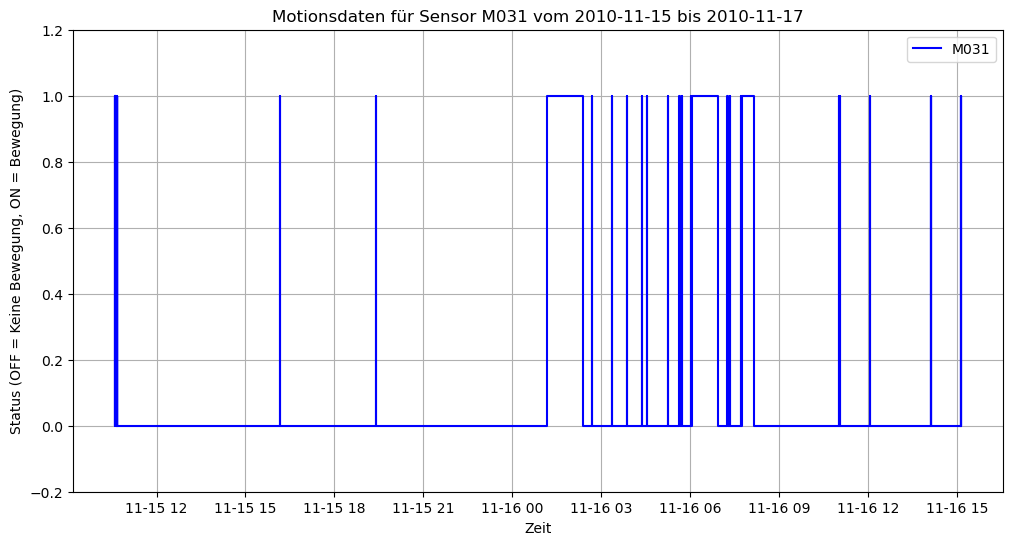

In [ ]:
# Beispiel Start- und Endzeit für die Zeitspanne
start_date = "2010-11-15"
end_date = "2010-11-17"

# Konvertiere Datum und Uhrzeit in eine einzige Spalte mit einem Datetime-Objekt für Bewegungssensoren
# Hier explizit das Format angeben
df_motion_sensor["datetime"] = pd.to_datetime(
    df_motion_sensor["date"] + " " + df_motion_sensor["time"], format="ISO8601"
)

# Filtere die Daten für die ausgewählte Zeitspanne
df_motion_sensor_m = df_motion_sensor[
    (df_motion_sensor["datetime"] >= pd.to_datetime(start_date))
    & (df_motion_sensor["datetime"] <= pd.to_datetime(end_date))
]

# Sortiere die Daten nach Datum und Uhrzeit
df_motion_sensor_m = df_motion_sensor_m.sort_values(by="datetime")

# Konvertiere sensor_status von OPEN/CLOSE zu numerischen Werten (0 = Keine Bewegung, 1 = Bewegung)
status_mapping = {
    "OFF": 0,
    "ON": 1,
}  # Hier gehe ich davon aus, dass 'OPEN' keine Bewegung bedeutet, 'CLOSE' Bewegung
df_motion_sensor_m["sensor_status_numeric"] = df_motion_sensor_m["sensor_status"].map(status_mapping)

# Erstelle eine Liste der einzigartigen Bewegungssensoren, sortiert nach der Nummer im Namen (z. B. M001 zuerst)
unique_sensors = df_motion_sensor_m["sensor_type"].unique()
sorted_sensors = sorted(unique_sensors, key=lambda x: int(x[1:]))

# Erstelle ein Diagramm für jeden Bewegungssensor
for sensor_id in sorted_sensors:
    # Daten für den aktuellen Sensor filtern
    sensor_data = df_motion_sensor_m[df_motion_sensor_m["sensor_type"] == sensor_id]

    # Neues Diagramm erstellen
    plt.figure(figsize=(12, 6))
    plt.step(
        sensor_data["datetime"],
        sensor_data["sensor_status_numeric"],
        where="post",
        label=sensor_id,
        color="blue",
    )
    plt.title(f"Motionsdaten für Sensor {sensor_id} vom {start_date} bis {end_date}")
    plt.xlabel("Zeit")
    plt.ylabel("Status (OFF = Keine Bewegung, ON = Bewegung)")
    plt.ylim(-0.2, 1.2)  # Setze die Grenzen der y-Achse für bessere Lesbarkeit
    plt.legend()
    plt.grid(True)
    plt.show()

/tmp/ipykernel_734/869356431.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_motion_sensor_h["sensor_status_numeric"] = df_motion_sensor_h[


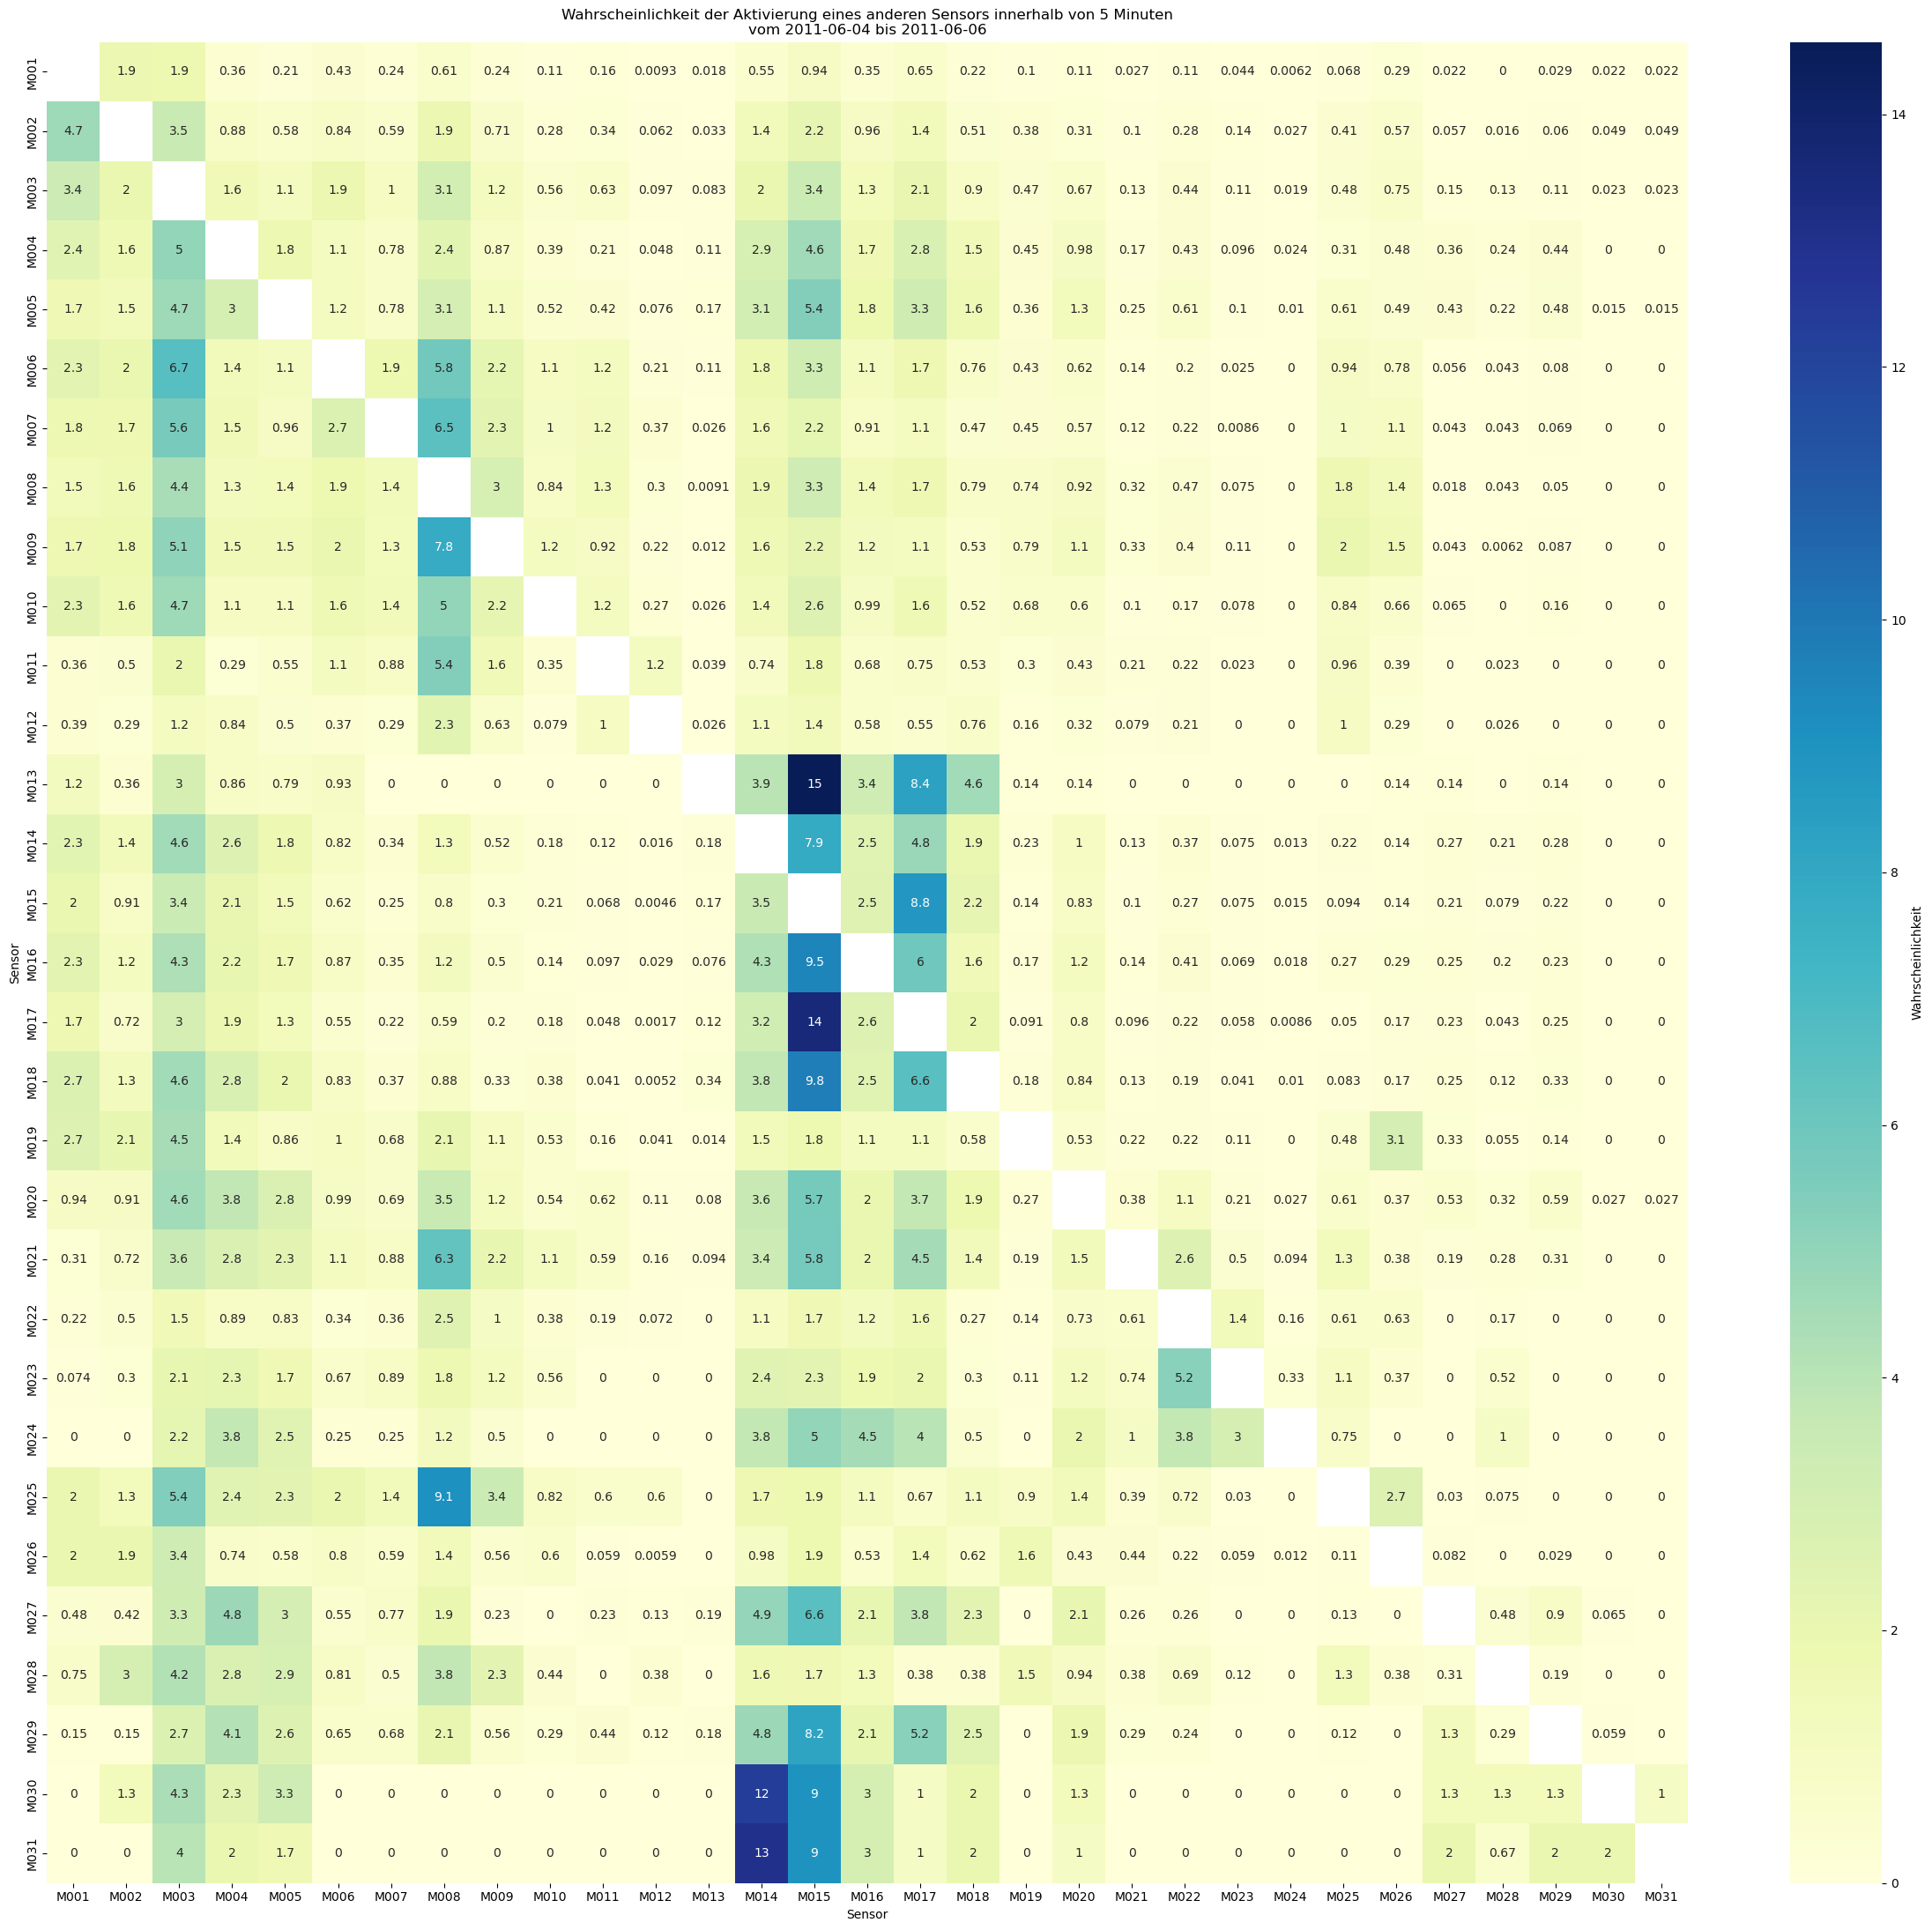

In [ ]:
# Beispiel Start- und Endzeit für die Zeitspanne
start_date = "2011-06-04"
end_date = "2011-06-06"

# Konvertiere Datum und Uhrzeit in eine einzige Spalte mit einem Datetime-Objekt für Bewegungssensoren
# df_motion_sensor["datetime"] = pd.to_datetime(
#    df_motion_sensor["date"] + " " + df_motion_sensor["time"], format="ISO8601"
# )

# Filtere die Daten für die ausgewählte Zeitspanne
df_motion_sensor_h = df_motion_sensor[
    (df_motion_sensor["datetime"] >= pd.to_datetime(start_date))
    & (df_motion_sensor["datetime"] <= pd.to_datetime(end_date))
]

# Konvertiere sensor_status von OFF/ON zu numerischen Werten (0 = Keine Bewegung, 1 = Bewegung)
status_mapping = {"OFF": 0, "ON": 1}  # 'OFF' = Keine Bewegung, 'ON' = Bewegung
df_motion_sensor_h["sensor_status_numeric"] = df_motion_sensor_h["sensor_status"].map(status_mapping)

# Erstelle eine Liste der einzigartigen Bewegungssensoren
unique_sensors = df_motion_sensor_h["sensor_type"].unique()

# Definiere das Zeitfenster (5 Minuten)
time_window = pd.Timedelta(minutes=5)

# DataFrame für die Häufigkeiten der Sensor-Aktivierungen nach 5 Minuten
probabilities = pd.DataFrame(columns=unique_sensors, index=unique_sensors)

# Berechne die Wahrscheinlichkeit, dass ein Sensor in den nächsten 5 Minuten aktiviert wird
for sensor_id in unique_sensors:
    # Daten für den aktuellen Sensor filtern (nur 'ON' Zustände)
    sensor_data = df_motion_sensor_h[df_motion_sensor_h["sensor_type"] == sensor_id]
    sensor_on_times = sensor_data[sensor_data["sensor_status_numeric"] == 1]["datetime"]

    for other_sensor_id in unique_sensors:
        if sensor_id == other_sensor_id:
            continue  # Ignoriere den gleichen Sensor

        # Daten für den anderen Sensor filtern (nur 'ON' Zustände)
        other_sensor_data = df_motion_sensor_h[df_motion_sensor_h["sensor_type"] == other_sensor_id]
        other_sensor_on_times = other_sensor_data[other_sensor_data["sensor_status_numeric"] == 1]["datetime"]

        # Zähle, wie oft der andere Sensor innerhalb von 5 Minuten nach dem aktuellen Sensor aktiviert wurde
        count = 0
        for activation_time in sensor_on_times:
            # Suche nach anderen Aktivierungen im 5-Minuten-Zeitraum nach dem aktuellen Sensor
            count += other_sensor_on_times[
                (other_sensor_on_times > activation_time) & (other_sensor_on_times <= activation_time + time_window)
            ].count()

        # Berechne die Wahrscheinlichkeit (Anzahl der Ereignisse / Gesamtanzahl der Aktivierungen des Sensors)
        probability = count / len(sensor_on_times) if len(sensor_on_times) > 0 else 0
        probabilities.loc[sensor_id, other_sensor_id] = probability

# Visualisierung der Wahrscheinlichkeit als Heatmap
plt.figure(figsize=(24, 22))  # Größere Visualisierung
sns.heatmap(
    probabilities.astype(float),
    annot=True,
    cmap="YlGnBu",
    cbar_kws={"label": "Wahrscheinlichkeit"},
    xticklabels=sorted(unique_sensors),
    yticklabels=sorted(unique_sensors),
)
plt.title(
    f"Wahrscheinlichkeit der Aktivierung eines anderen Sensors innerhalb von 5 Minuten\nvom {start_date} bis {end_date}"
)
plt.xlabel("Sensor")
plt.ylabel("Sensor")
plt.tight_layout()  # Um sicherzustellen, dass die Labels gut sichtbar sind
plt.show()

/tmp/ipykernel_734/3979352554.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_motion_sensor_f["sensor_status_numeric"] = df_motion_sensor_f["sensor_status"].map(status_mapping)
/tmp/ipykernel_734/3979352554.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .groupby([pd.Grouper(freq=aggregation_interval), "sensor_type"])  # Gruppierung


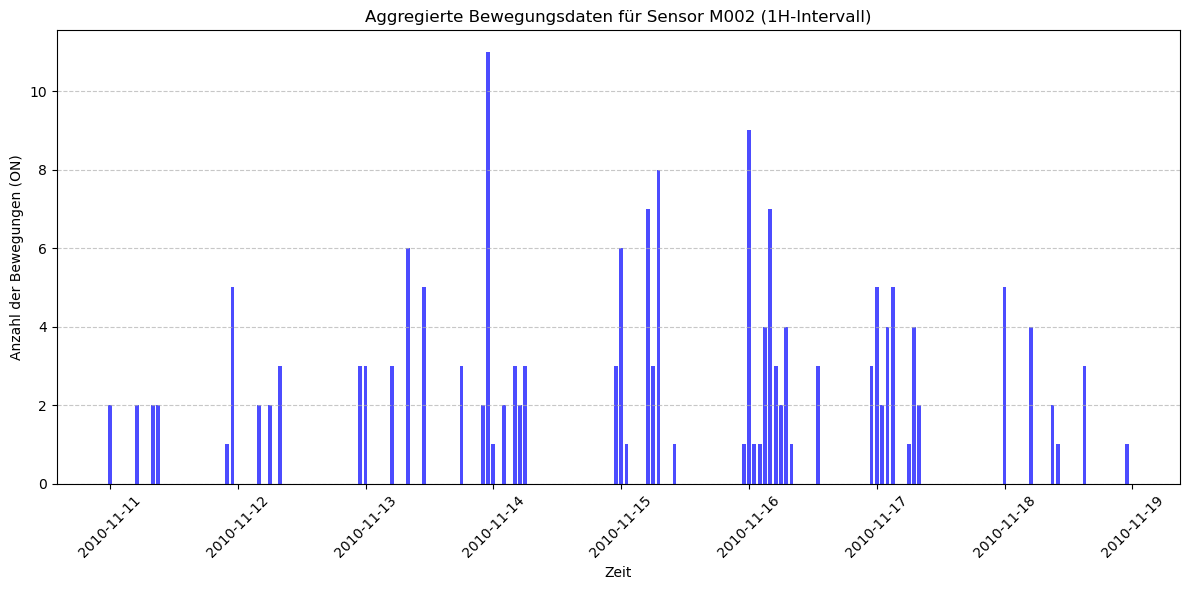

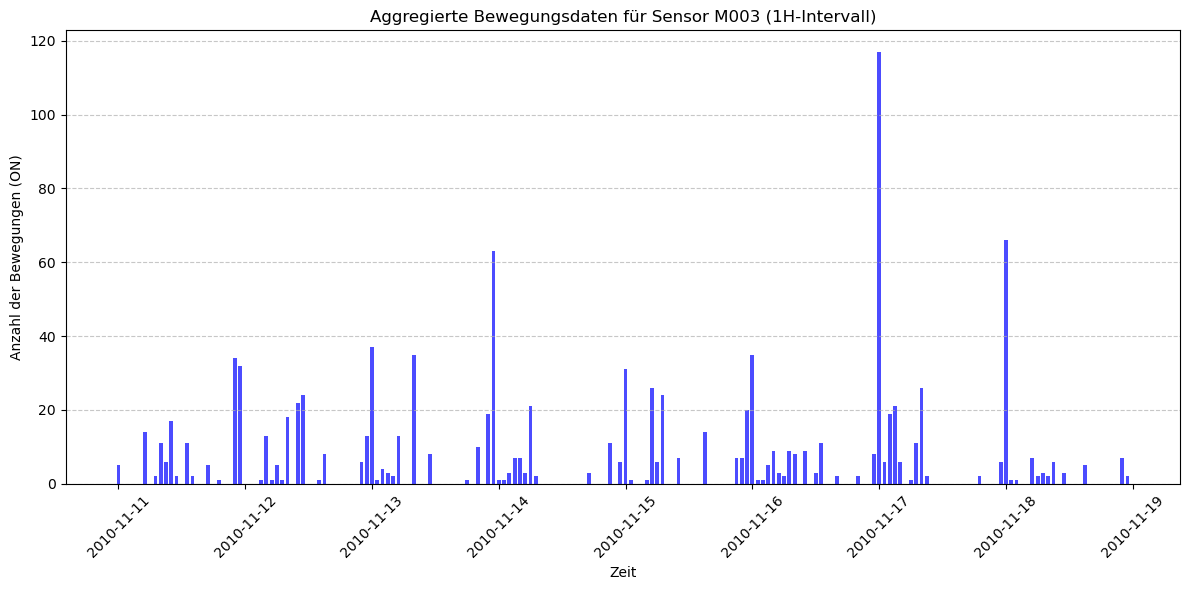

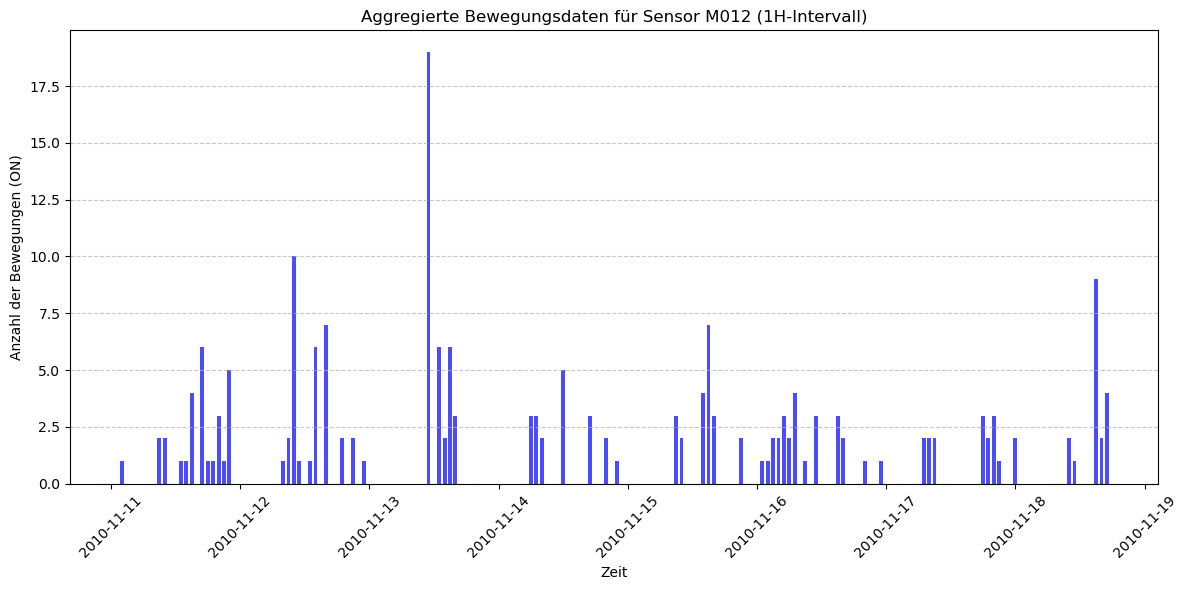

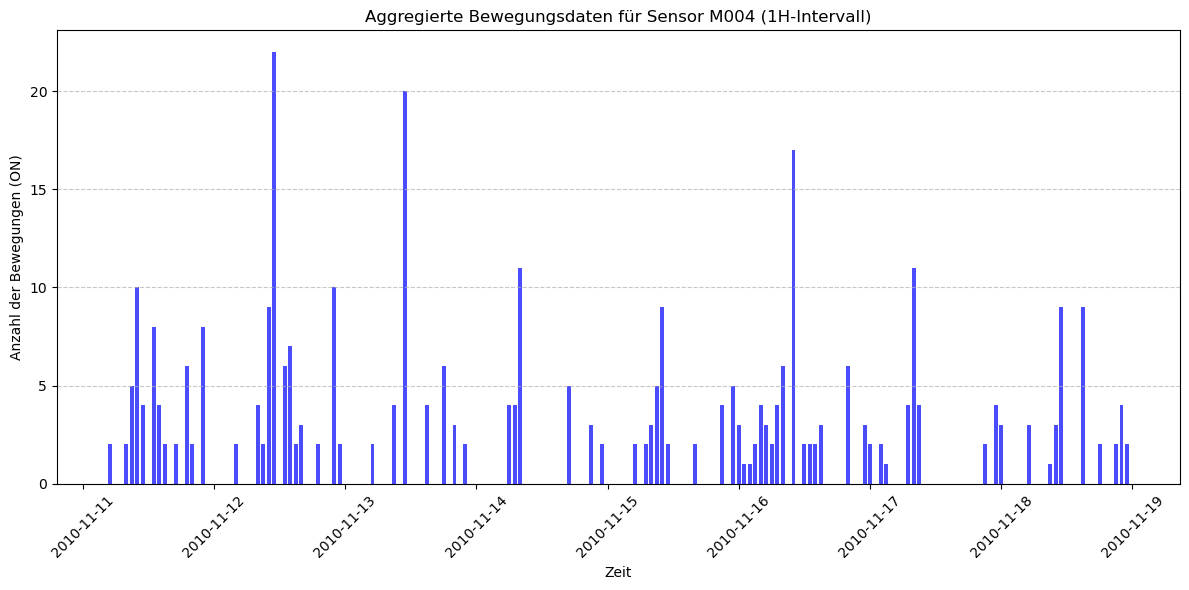

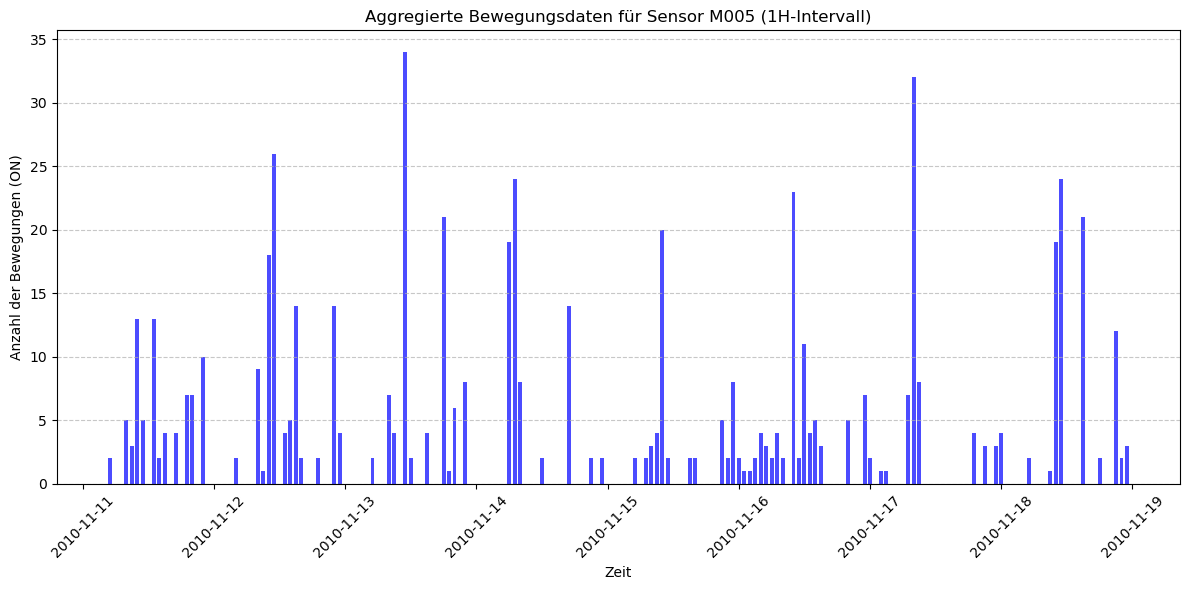

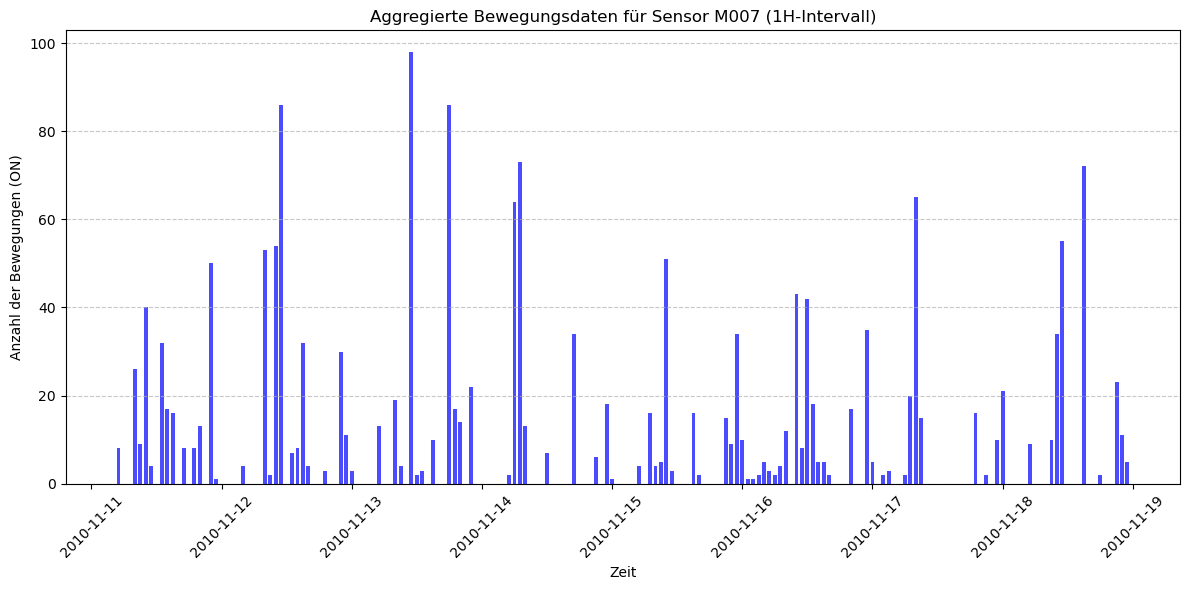

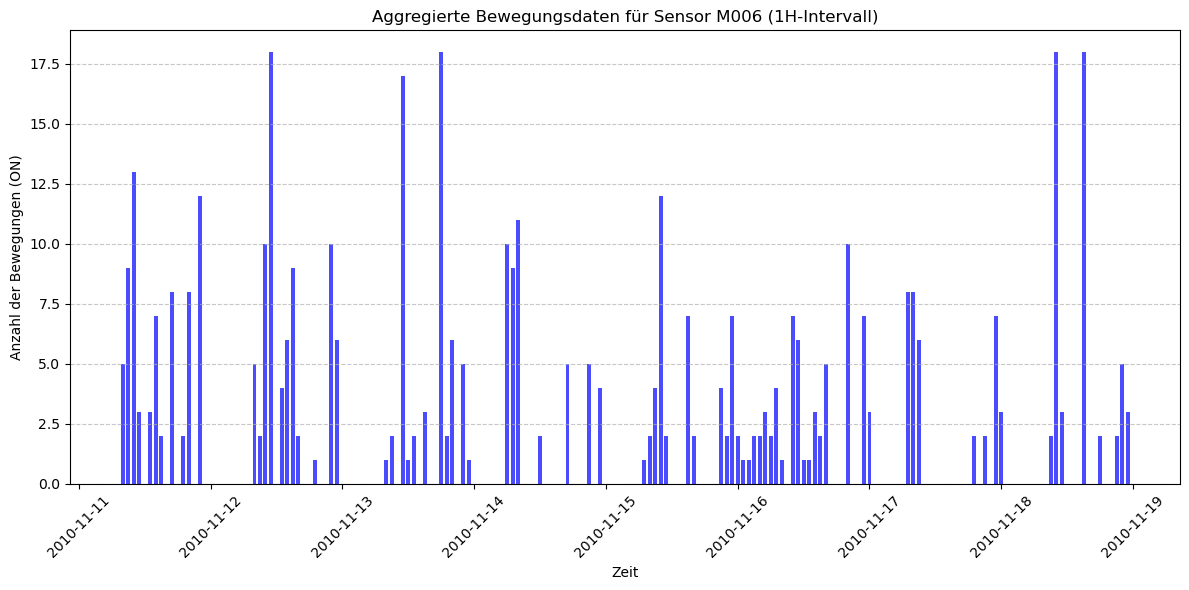

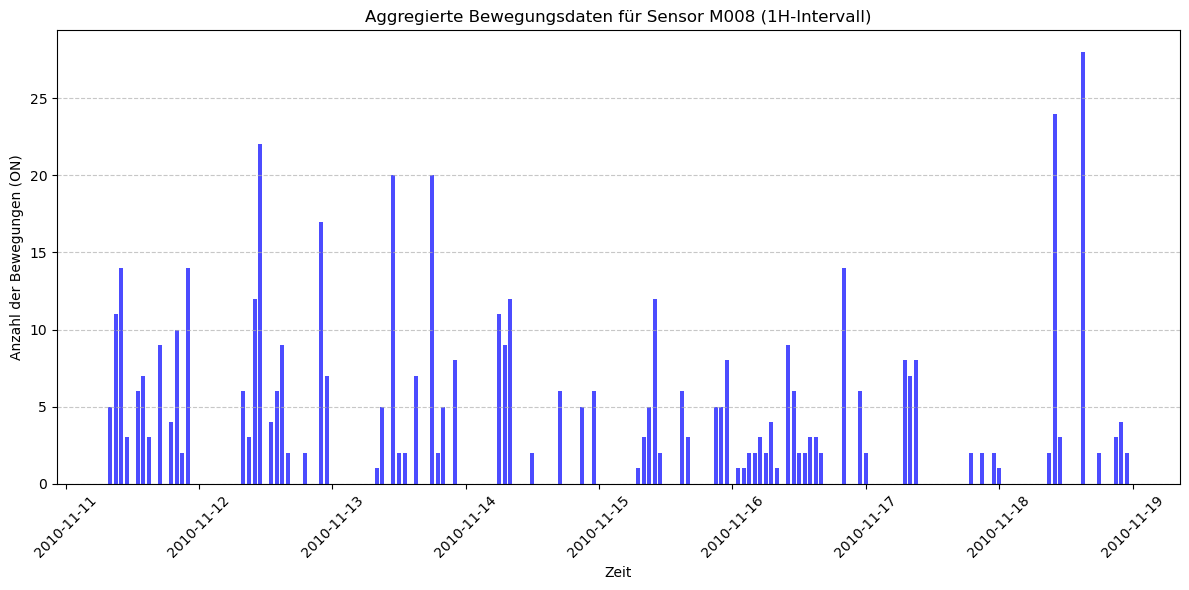

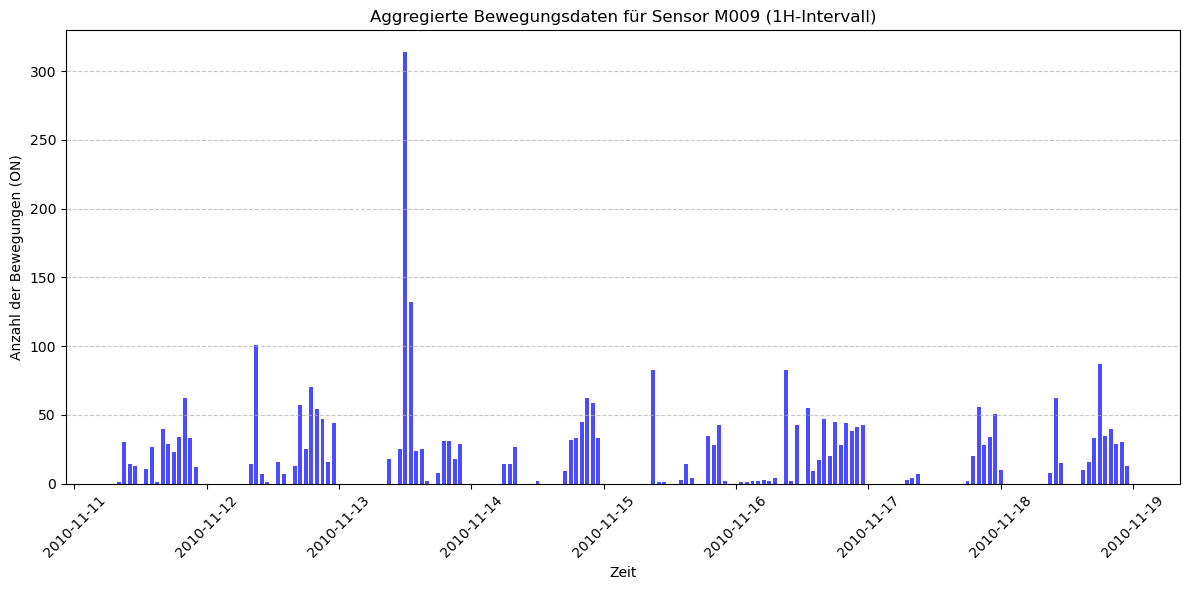

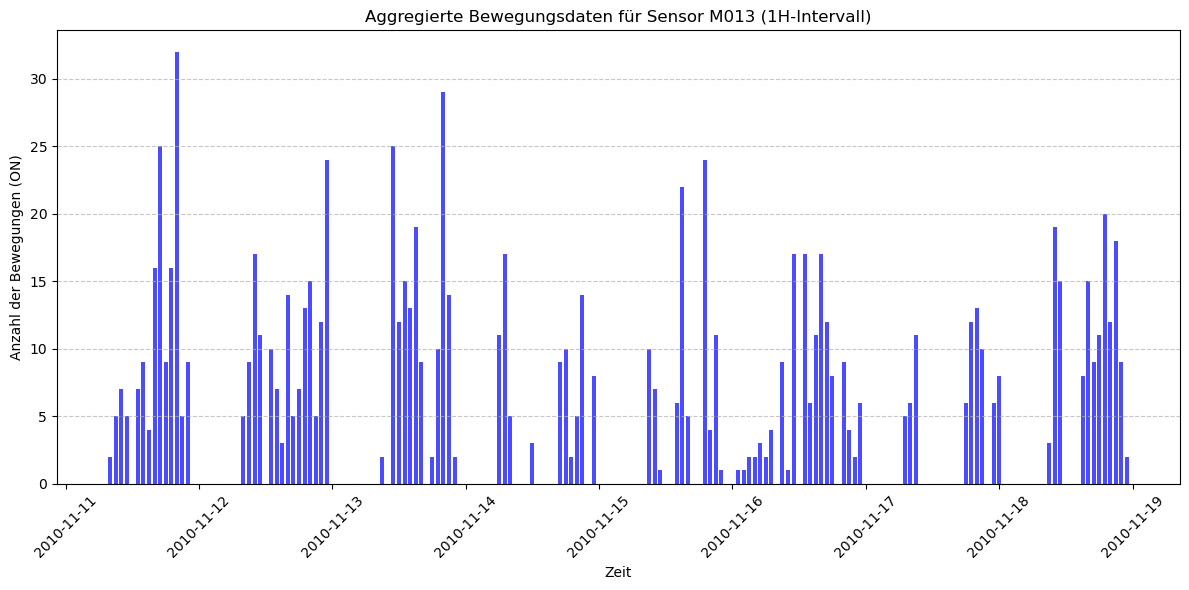

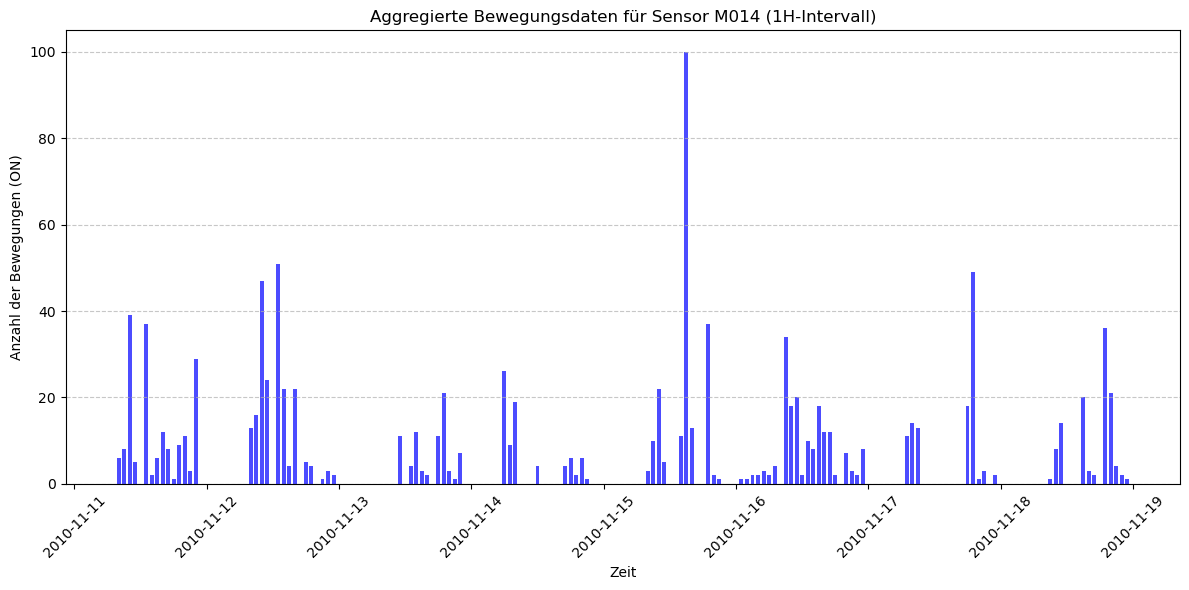

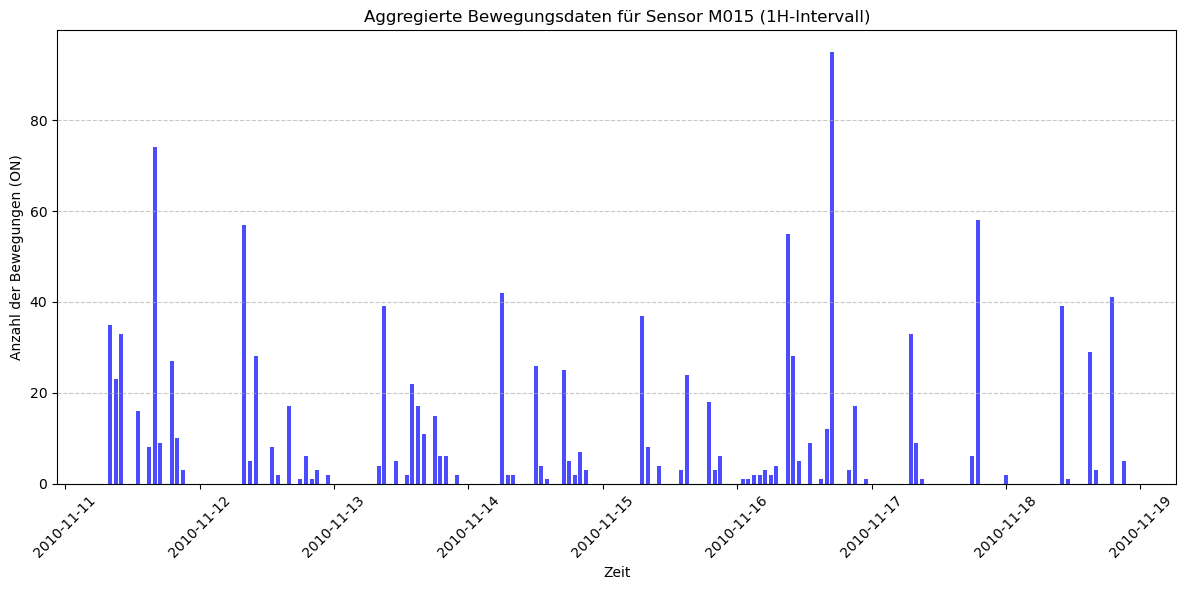

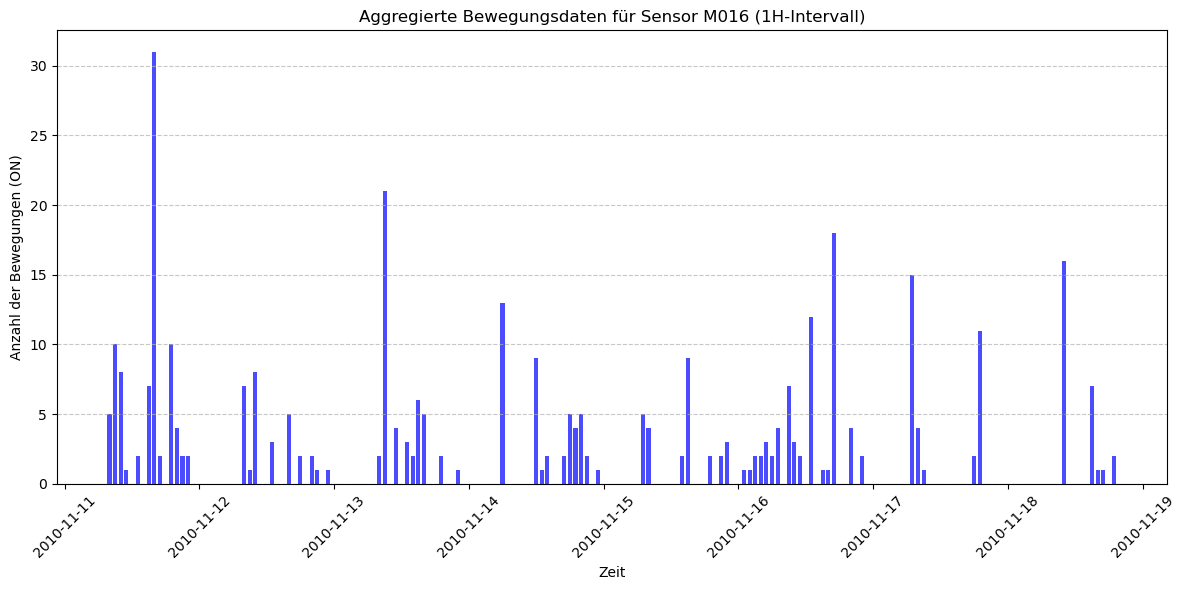

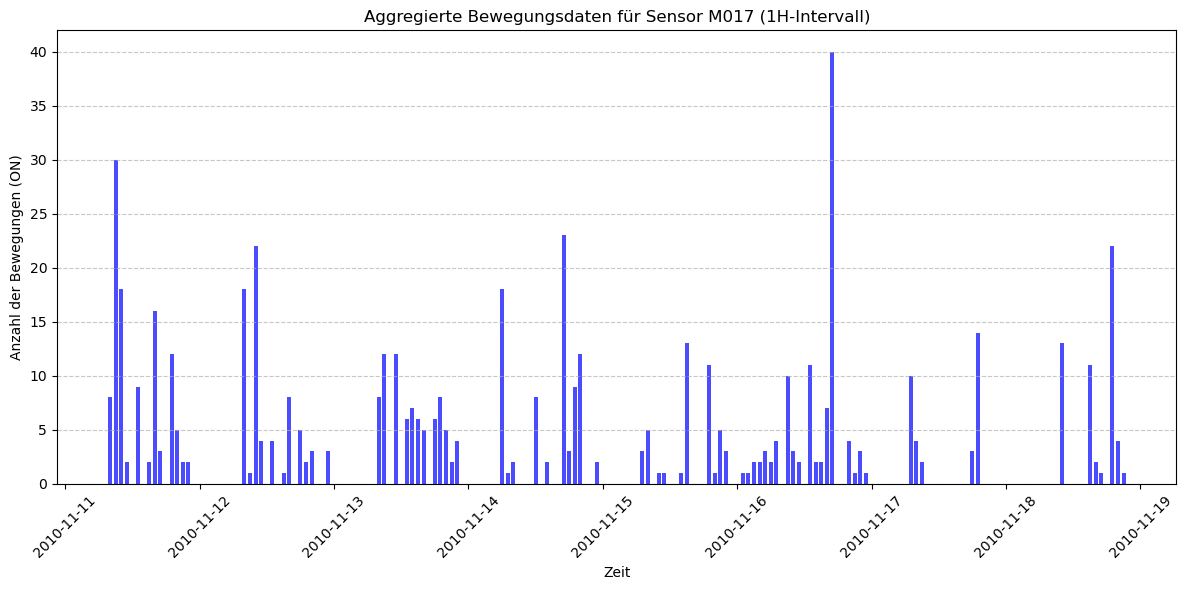

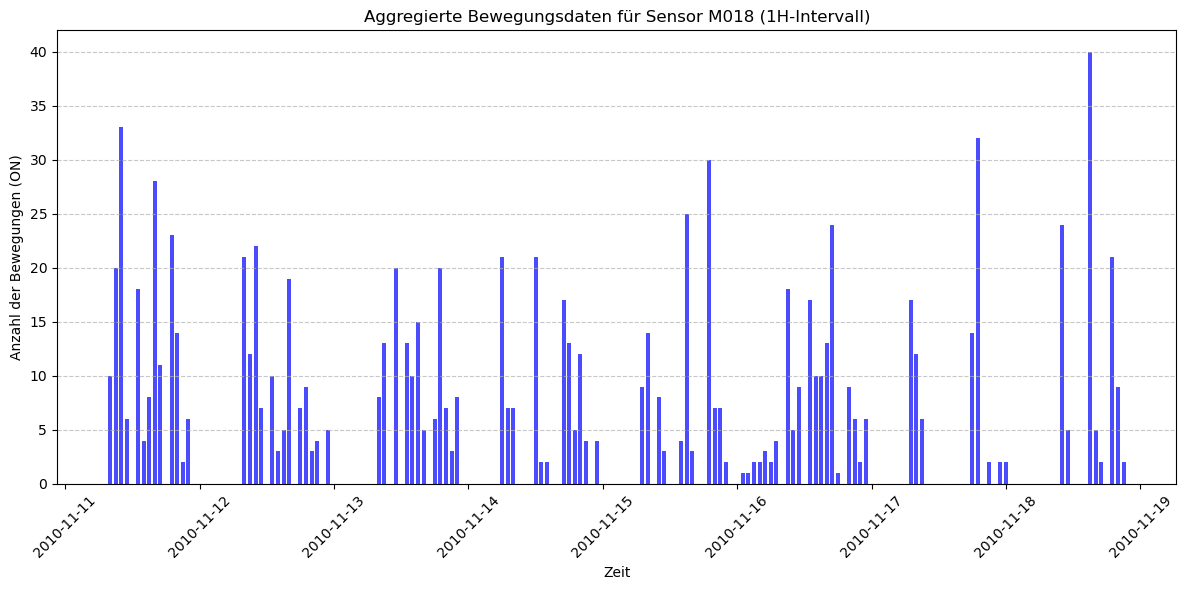

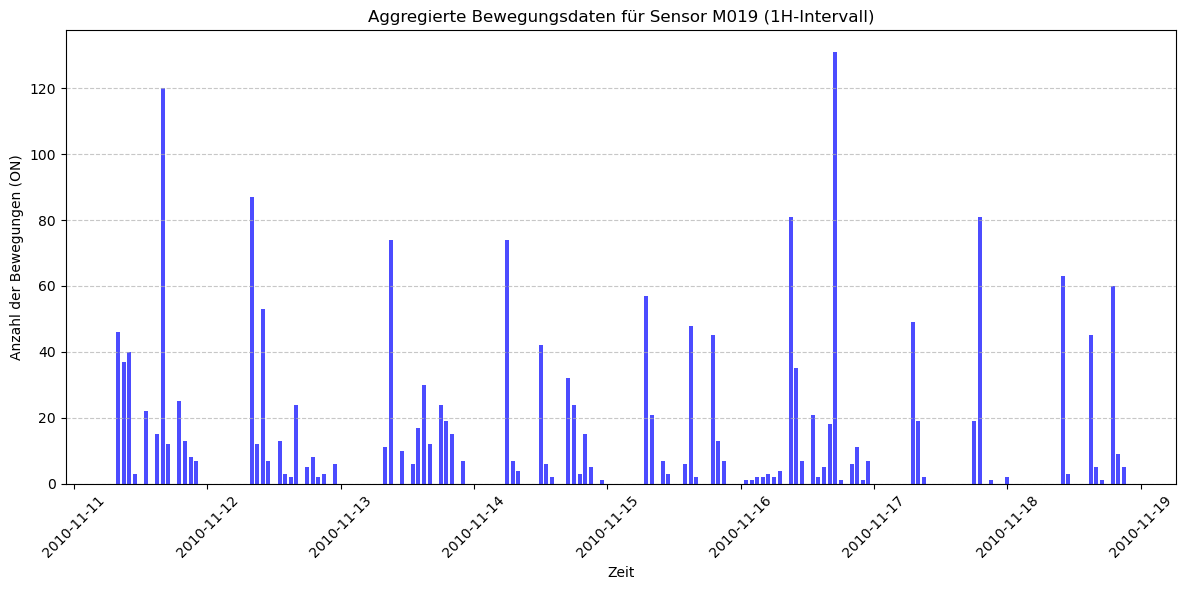

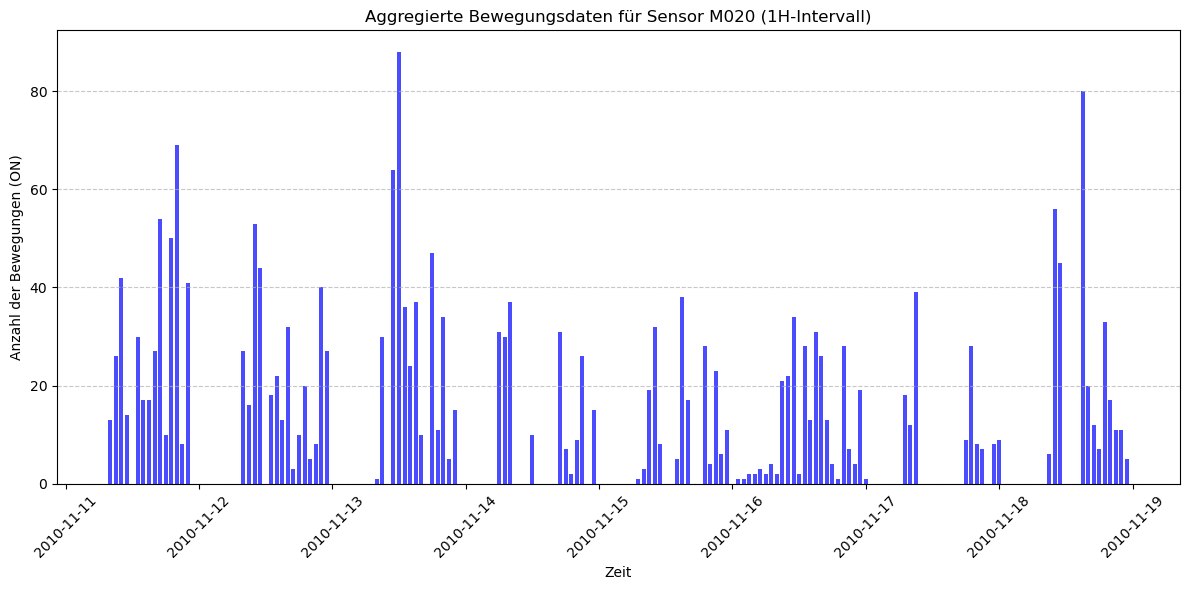

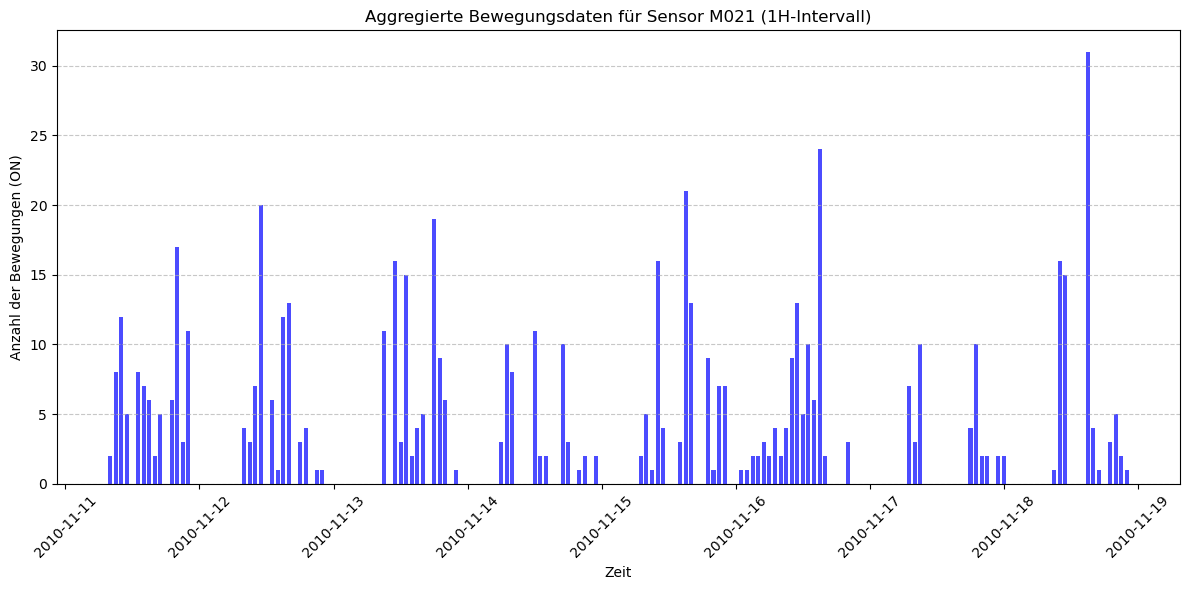

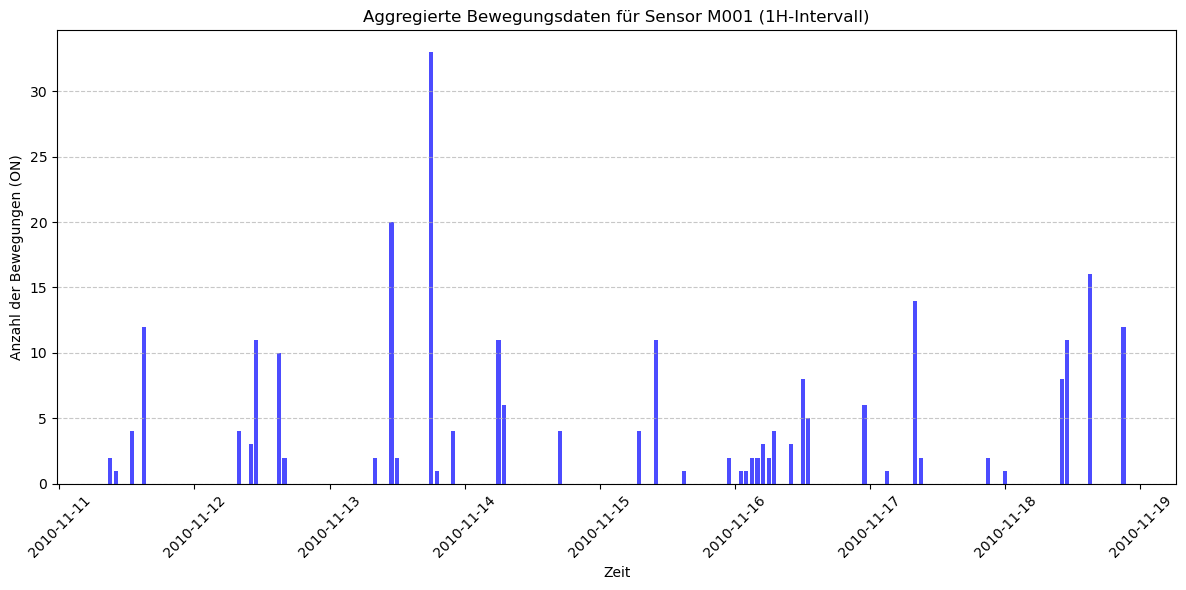

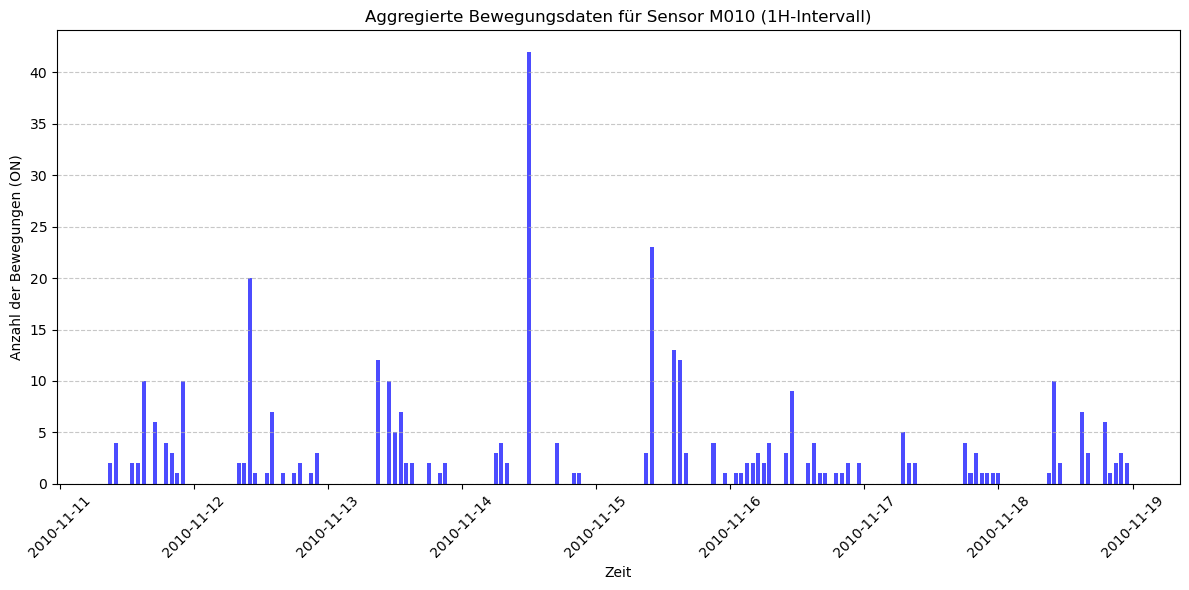

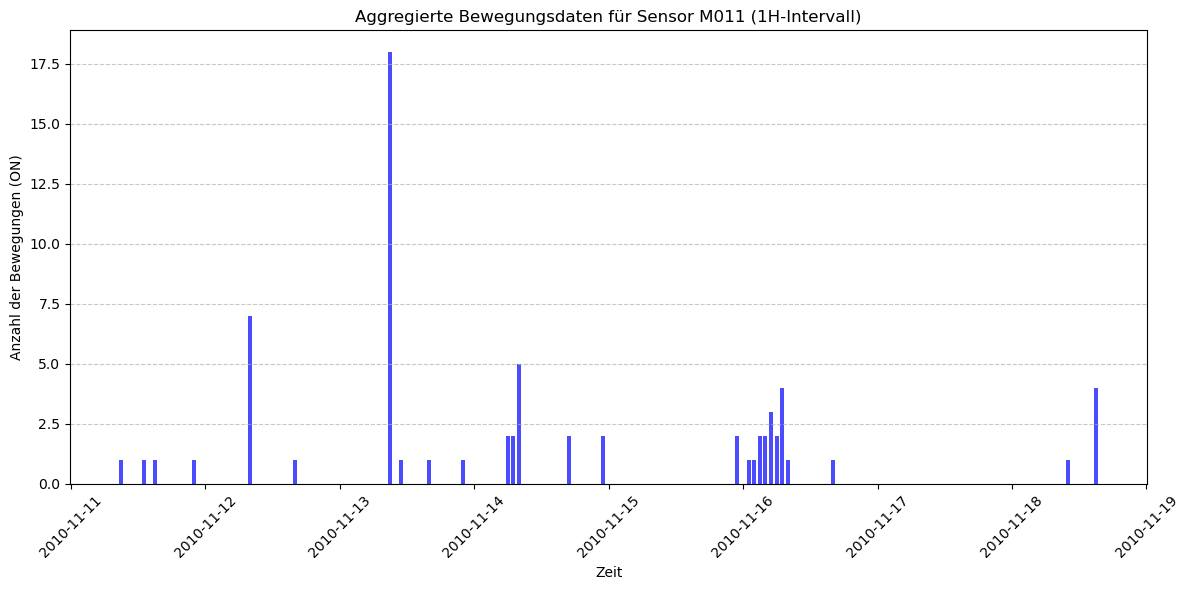

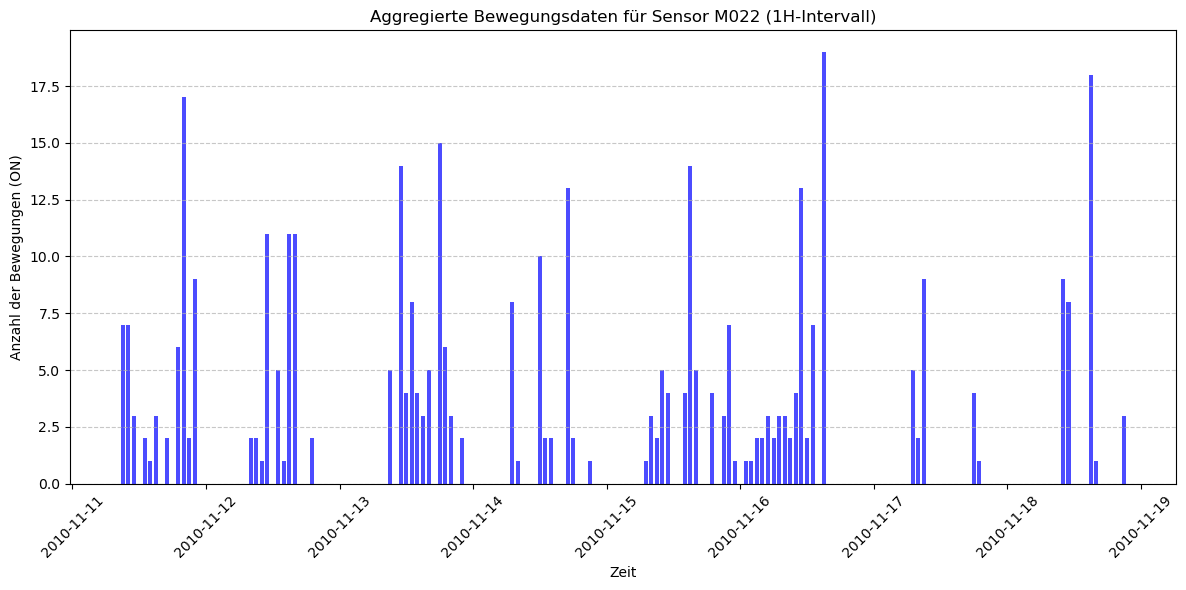

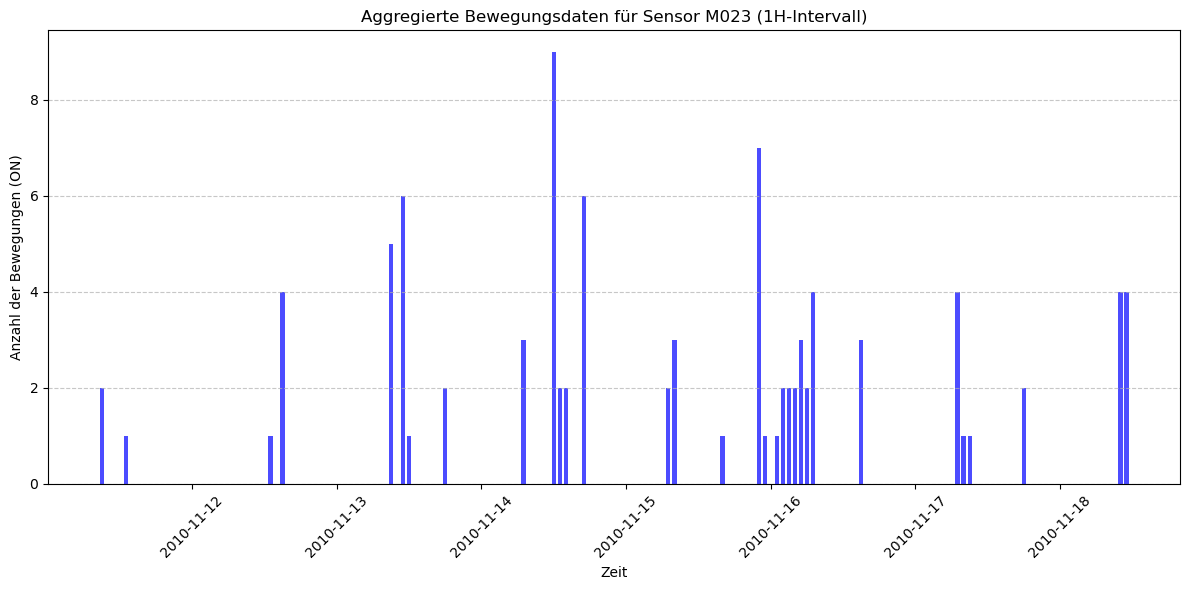

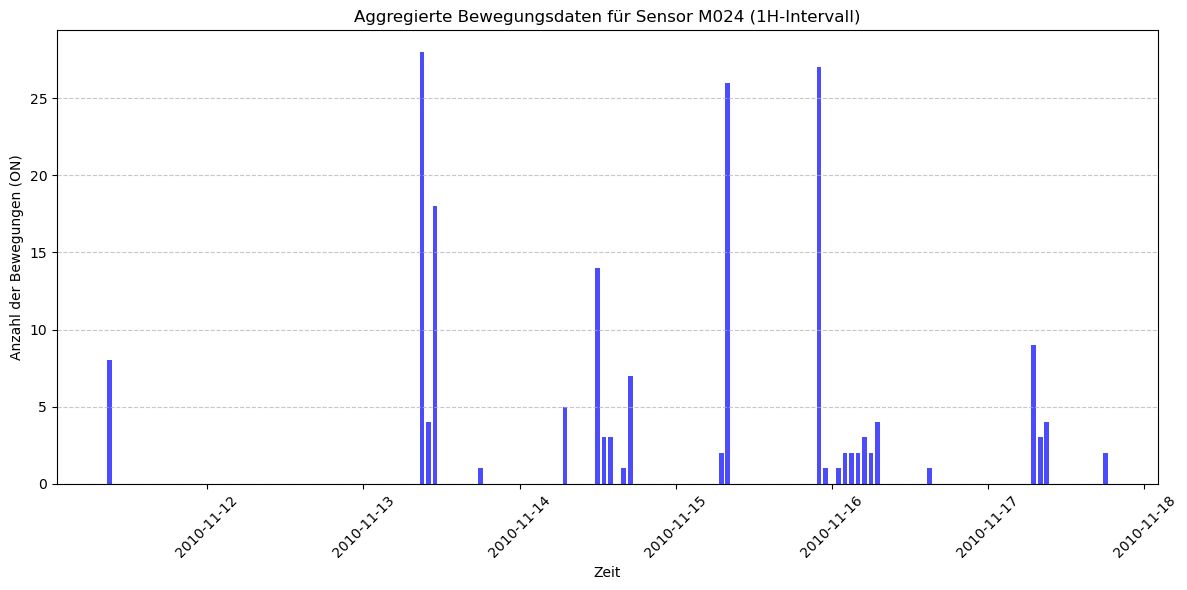

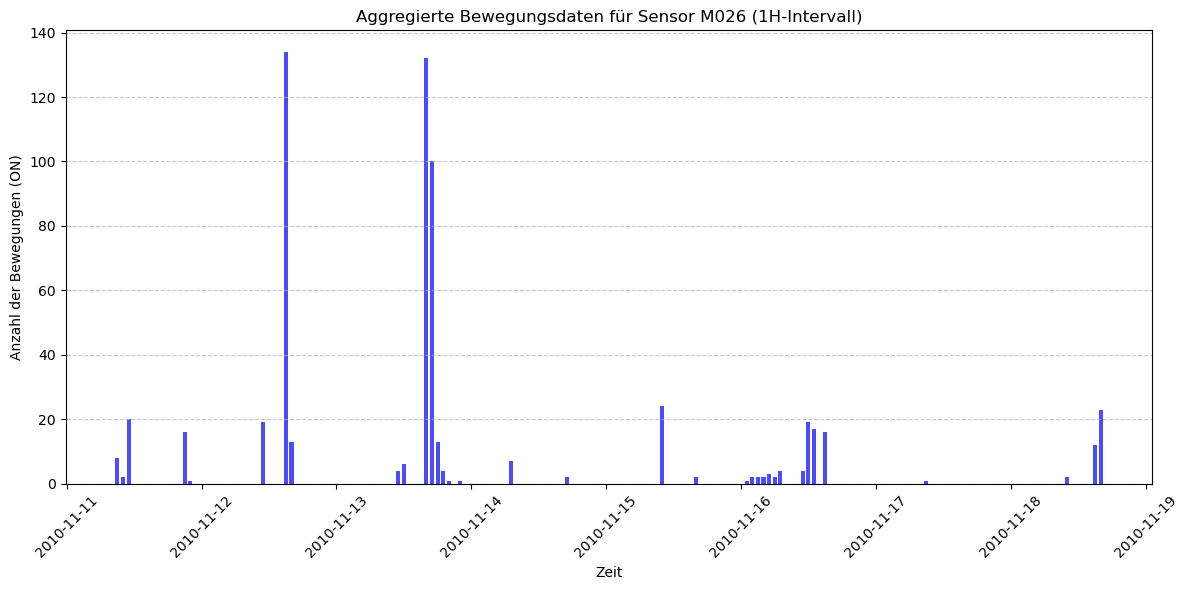

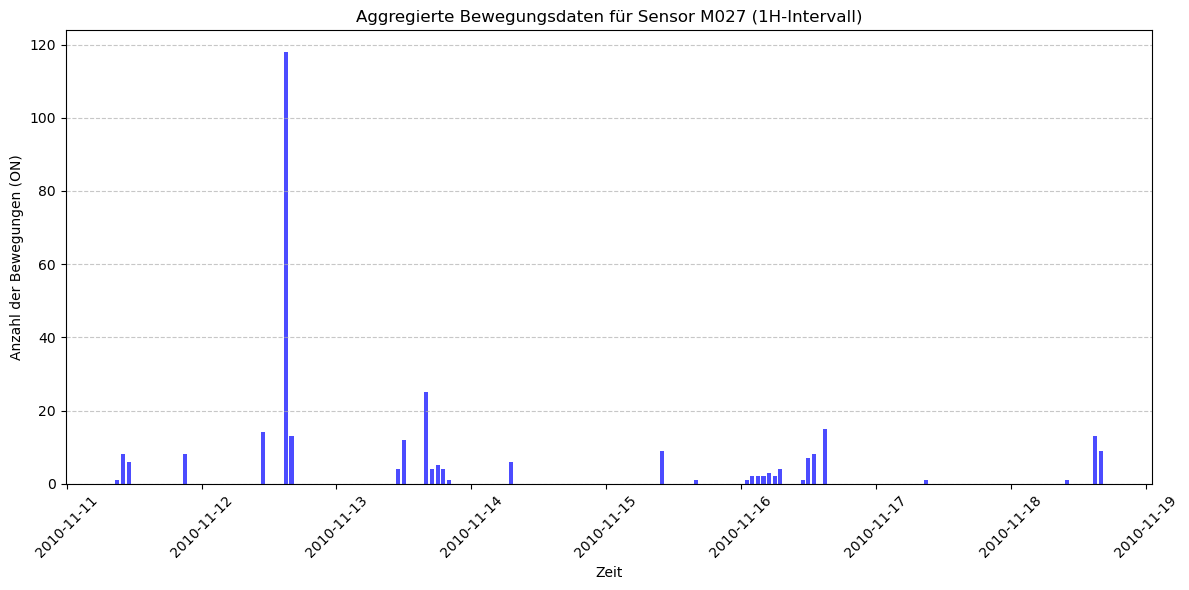

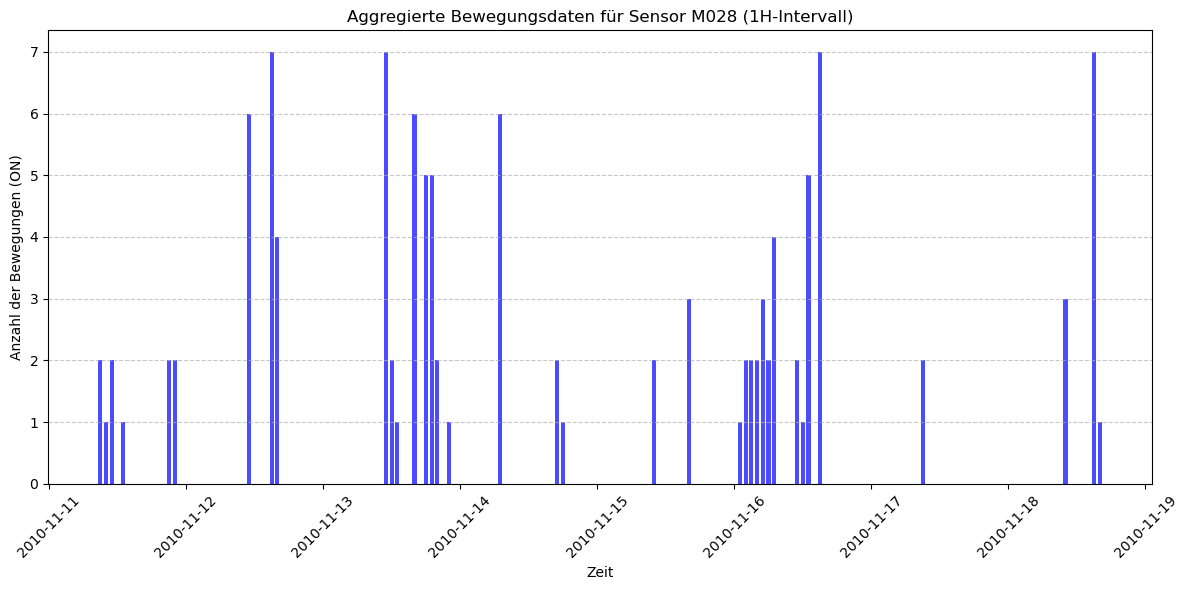

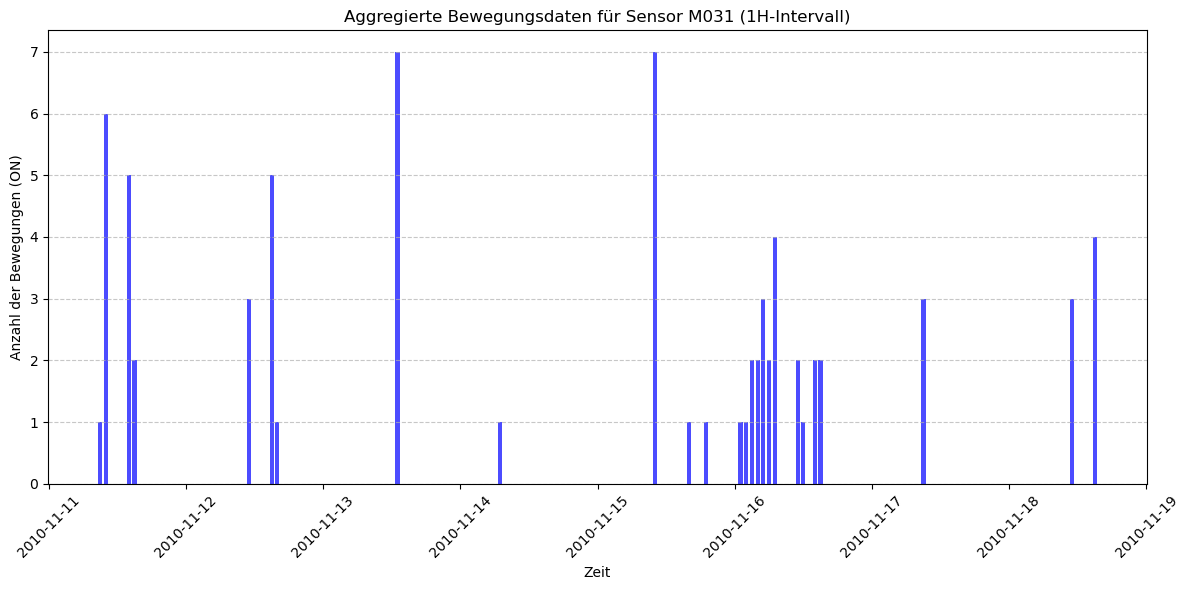

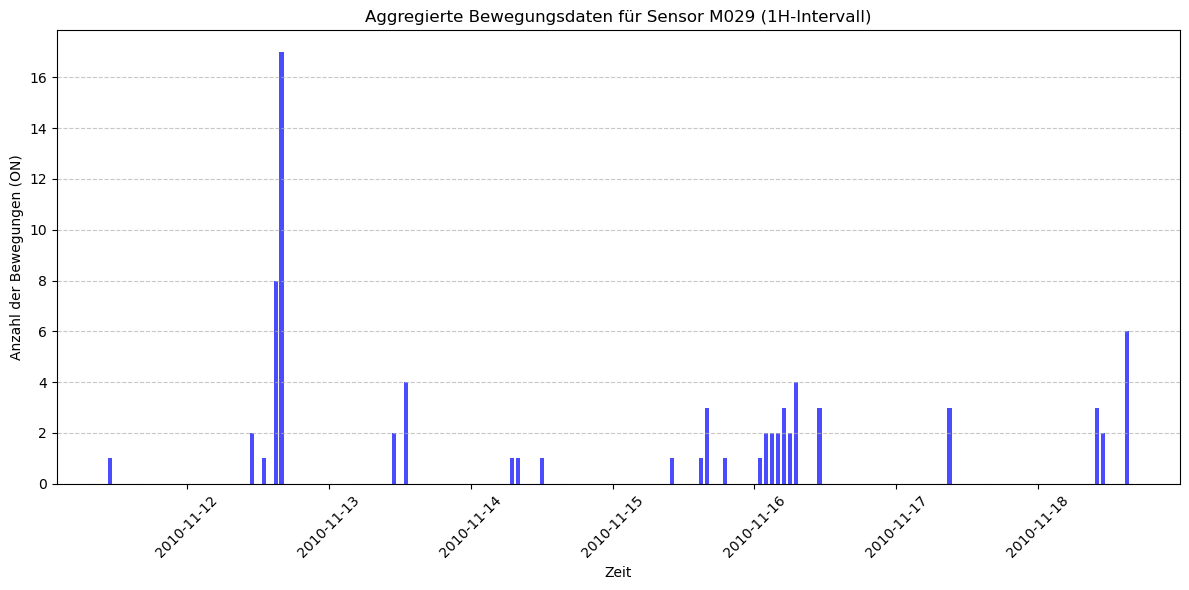

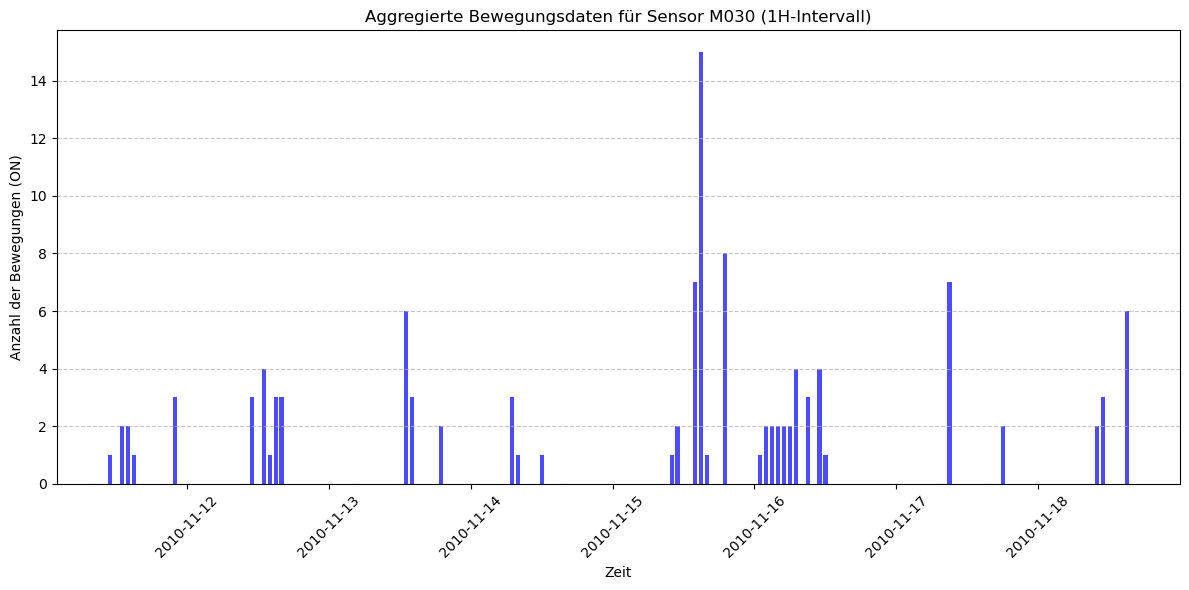

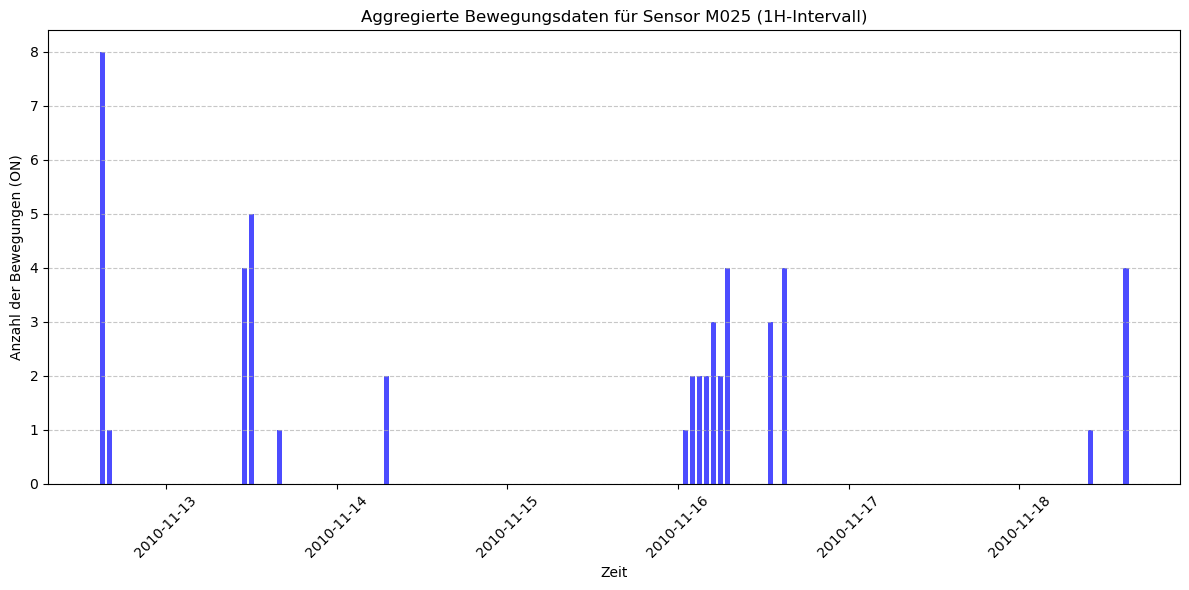

In [ ]:
start_date = "2010-11-11"
end_date = "2010-11-19"

# Konvertiere Datum und Uhrzeit in eine einzige Spalte mit einem Datetime-Objekt
# df_motion_sensor["datetime"] = pd.to_datetime(
#    df_motion_sensor["date"] + " " + df_motion_sensor["time"], format="ISO8601"
# )

# Filtere die Daten für die ausgewählte Zeitspanne
df_motion_sensor_f = df_motion_sensor[
    (df_motion_sensor["datetime"] >= pd.to_datetime(start_date))
    & (df_motion_sensor["datetime"] <= pd.to_datetime(end_date))
]

# Konvertiere sensor_status von OPEN/CLOSE zu numerischen Werten (0 = Keine Bewegung, 1 = Bewegung)
status_mapping = {"OFF": 0, "ON": 1}
df_motion_sensor_f["sensor_status_numeric"] = df_motion_sensor_f["sensor_status"].map(status_mapping)

# Aggregiere die Anzahl der Bewegungen für jeden Sensor in definierten Intervallen (z. B. Stunden)
# Wähle ein Aggregationsintervall: z. B. '1H' = 1 Stunde, '1D' = 1 Tag
aggregation_interval = "1H"  # Beispiel: Stündliche Aggregation

# Gruppiere nach Zeitintervallen und Sensor-ID
df_motion_sensor_f.set_index("datetime", inplace=True)  # Datetime als Index setzen
aggregated_data = (
    df_motion_sensor_f[df_motion_sensor_f["sensor_status_numeric"] == 1]  # Nur Bewegung "ON"
    .groupby([pd.Grouper(freq=aggregation_interval), "sensor_type"])  # Gruppierung
    .size()  # Zähle die Ereignisse
    .reset_index(name="motion_count")  # Umbenennen der aggregierten Spalte
)

# Erstelle ein Diagramm für jeden Bewegungssensor
unique_sensors = aggregated_data["sensor_type"].unique()
for sensor_id in unique_sensors:
    # Daten für den aktuellen Sensor filtern
    sensor_data = aggregated_data[aggregated_data["sensor_type"] == sensor_id]

    # Neues Balkendiagramm erstellen
    plt.figure(figsize=(12, 6))
    plt.bar(sensor_data["datetime"], sensor_data["motion_count"], width=0.03, color="blue", alpha=0.7)
    plt.title(f"Aggregierte Bewegungsdaten für Sensor {sensor_id} ({aggregation_interval}-Intervall)")
    plt.xlabel("Zeit")
    plt.ylabel("Anzahl der Bewegungen (ON)")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()